**Gun-classification-using-gunshot**\
By-N.Harihara Valliappan

**Enhancing Gun Detection with Transfer Learning**
**and YAMNet Audio Classification**

Name-Harihara Valliappan\
RegNo-21bce8530 \

Accuracy,f1_score,precisionns of different parameters:\
**(i)By spliting:**\
a)80-10-10 -81.51%\
b)70-15-15 -76.09%\
c)60-25-15 -76.85%\
d)90-5-5  -55.35%\
**(ii)By optimizers**\
a)Adam- 81.14% , 80.69% , 81.80% \
b)RMSprop- 81.42% , 80.57% , 80.79% \
c)Adagrad-73.49% , 70.22% , 72.25% \
d)SGD- 79.87% , 78.14% , 77.08% \
e)Adamax - 82.60% , 81.49% , 81.40% \
f)adadelta - 59.82% , 50.14% , 43.67%\
g)ftrl - 63.02% , 48.72% , 39.71% \

**(iii)Different layers**\
a)relu-softmax - 81.14%\
b)relu-relu-elu-relu - 82.14%\
c)relu-dropout-relu-relu-relu-softmax- 82.05% \
d)tanh-79.78% \

**(iv)Droupout score:**\
a)0.2 - 82.14% , 81.79% , 82.57% \
b)0.5 - 81.69% , 80.70% , 80.90% \
c)0,8 - 82.14% , 80.81% , 82.07% \

**(v)Loss function:**\
a)Sartial categorial-81.14% , 80.69% , 81.80% \
b)kullback_leibler -2.55%,0.61%,0.46%\
c)squared-hinge - 3.55% , 0,78% , 0.46% \

**vi)Learing rate:**\
a) 0.1- 63.38% , 64.01% , 71.32% \
b)0.01- 82.44% , 8145% , 82.22% \
c)0.001 -81.87% 80.33% , 81.47% \
d)0.0001 -77.68% , 76.53% , 76.78% \

**vii)Regularization:** \
a)L1- 78.05% , 76.5% , 76.56% \
b)L2 - 84.42% 80.91% 80 26% \

**viii)Hybrid aproach:**\
a)SVM-81.6%\
b)KNN 1-78.06%\
c)KNN 3-78.14%\
d)KNN 5-78.32% \

**xi)epochs:**\
a)10 - 82.14%\
b)50 - 82.14%\
c)100 - 82.33% \
d)200(0nly 138 performed) -81.96% \

**Making all the hyperparameters we finally get accuracy :** 82.969%

In [1]:
# !pip install --no-cache-dir -q "tensorflow==2.13.*"
# # tensorflow_io 0.28 is compatible with TensorFlow 2.11
# !pip install --no-cache-dir -q "tensorflow_io==0.34.0"

In [2]:
# !pip install protobuf==3.20
# !pip install protobuf==3.20.3

In [3]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [4]:
# !ln -s /content/gdrive/My\ Drive/ /mydrive

In [5]:
# g=%cd /mydrive/gunsound
# g

In [6]:
# g='/mydrive/gunsound'
# g

In [7]:
import os
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_io as tfio
from sklearn.metrics import confusion_matrix
import seaborn as sns
from IPython import display

In [8]:
yamnet_model_ = 'https://tfhub.dev/google/yamnet/1'
yamnet_model = hub.load(yamnet_model_)

In [9]:
esc = 'gun.csv'
base_data_path = '/Data'
pd_data = pd.read_csv(esc)
pd_data.head()

,sound,Fold,Cateogry,Target
0,1 (1).wav,5,AK-47,1
1,1 (2).wav,5,AK-47,1
2,1 (3).wav,5,AK-47,1
3,1 (4).wav,5,AK-47,1
4,1 (5).wav,5,AK-47,1


In [10]:
my_class = ['AK-47', 'IMI Desert Eagle', 'AK-12', 'M4', 'M16', 'M249', 'MG-42', 'MP5','Zastava M92','Glock9','Ruger 10/22','Ruger Blackhawk']
mapcl= {'AK-47':1,'IMI Desert Eagle':2,'AK-12':3,'M4':4,'M16':5,'M249':6,'MG-42':7,'MP5':8,'Zastava M92':9,'Glock9':10,'Ruger 10/22':11,'Ruger Blackhawk':12}
filter_pd = pd_data[pd_data['Target'].isin(my_class)]
class_id = filter_pd['Target'].map(mapcl)
filter_pd = filter_pd.assign(target=class_id)

In [11]:

full_path = pd_data['sound'].apply(lambda row: os.path.join(base_data_path, row))
filter_pd = pd_data.assign(filename=full_path)
filter_pd.tail()

,sound,Fold,Cateogry,Target,filename
1169,12 (105).wav,5,Ruger Blackhawk,12,/Data/12 (105).wav
1170,12 (106).wav,5,Ruger Blackhawk,12,/Data/12 (106).wav
1171,12 (107).wav,5,Ruger Blackhawk,12,/Data/12 (107).wav
1172,12 (108).wav,5,Ruger Blackhawk,12,/Data/12 (108).wav
1173,12 (109).wav,5,Ruger Blackhawk,12,/Data/12 (109).wav


In [12]:
shuffled_df = filter_pd.sample(frac=1, axis=0, random_state=100)

print(shuffled_df)

            sound  Fold          Cateogry  Target           filename
1153  12 (89).wav     5   Ruger Blackhawk      12  /Data/12 (89).wav
537    6 (68).wav     5              M249       6   /Data/6 (68).wav
634    7 (66).wav     5             MG-42       7   /Data/7 (66).wav
384    5 (15).wav     5               M16       5   /Data/5 (15).wav
118    2 (47).wav     5  IMI Desert Eagle       2   /Data/2 (47).wav
...           ...   ...               ...     ...                ...
802    9 (34).wav     5       Zastava M92       9   /Data/9 (34).wav
53     1 (54).wav     5             AK-47       1   /Data/1 (54).wav
350    4 (81).wav     5                M4       4   /Data/4 (81).wav
79      2 (8).wav     5  IMI Desert Eagle       2    /Data/2 (8).wav
792    9 (24).wav     5       Zastava M92       9   /Data/9 (24).wav

[1174 rows x 5 columns]


In [13]:
train=shuffled_df[:940]                   #ratio 80-10-10
val = shuffled_df[940: 940 + 117]
test = shuffled_df[-117:]

In [14]:
filenames = train['filename']
targets = train['Target']
folds = train['Fold']
'''filenames_tensor = tf.constant(filenames)
targets_tensor = tf.constant(targets)
folds_tensor = tf.constant(folds)'''
train_ds = tf.data.Dataset.from_tensor_slices((filenames, targets,folds))
filenames = val['filename']
targets = val['Target']
folds = val['Fold']
val_ds = tf.data.Dataset.from_tensor_slices((filenames, targets,folds))
filenames = test['filename']
targets = test['Target']
folds = test['Fold']
test_ds = tf.data.Dataset.from_tensor_slices((filenames, targets,folds))
train_ds.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [15]:
def load_wav_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(
          file_contents,
          desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [16]:
def load_wav_for_map(filename, label,folds):
  return load_wav_16k_mono(filename), label,folds

train_ds = train_ds.map(load_wav_for_map)
val_ds = val_ds.map(load_wav_for_map)
test_ds = test_ds.map(load_wav_for_map)
val_ds.element_spec

AttributeError: in user code:

    File "/var/folders/t9/t43x1h1d24z9__zp5cb6qpx80000gn/T/ipykernel_14221/1624312273.py", line 2, in load_wav_for_map  *
        return load_wav_16k_mono(filename), label,folds
    File "/var/folders/t9/t43x1h1d24z9__zp5cb6qpx80000gn/T/ipykernel_14221/212221097.py", line 9, in load_wav_16k_mono  *
        wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    File "/Users/jaycrappe/Documents/GitHub/Gun-classification-using-gunshot/env/lib/python3.11/site-packages/tensorflow_io/python/ops/audio_ops.py", line 466, in f  *
        i, rate_in=rate_in, rate_out=rate_out, name=name
    File "/Users/jaycrappe/Documents/GitHub/Gun-classification-using-gunshot/env/lib/python3.11/site-packages/tensorflow_io/python/ops/__init__.py", line 88, in __getattr__
        return getattr(self._load(), attrb)

    AttributeError: module '56c055b4afaba95af0256db7c72edd0d967e1981' has no attribute 'io_audio_resample'


In [ ]:
def extract_embedding(wav_data, label,folds):
  ''' run YAMNet to extract embedding from the wav data '''
  scores, embeddings, spectrogram = yamnet_model(wav_data)
  num_embeddings = tf.shape(embeddings)[0]
  return (embeddings,
            tf.repeat(label, num_embeddings),tf.repeat(folds, num_embeddings))



In [ ]:
train_ds = train_ds.map(extract_embedding).unbatch()
test_ds = test_ds.map(extract_embedding).unbatch()
val_ds = val_ds.map(extract_embedding).unbatch()

TypeError: in user code:

    File "/var/folders/t9/t43x1h1d24z9__zp5cb6qpx80000gn/T/ipykernel_1492/1919509409.py", line 3, in extract_embedding  *
        scores, embeddings, spectrogram = yamnet_model(wav_data)

    TypeError: Binding inputs to tf.function `f` failed due to `Tensor conversion requested dtype float32 for Tensor with dtype string: <tf.Tensor 'args_0:0' shape=() dtype=string>`. Received args: (<tf.Tensor 'args_0:0' shape=() dtype=string>,) and kwargs: {} for signature: (waveform: TensorSpec(shape=(None,), dtype=tf.float32, name=None)).


In [ ]:

remove_fold_column = lambda embedding, label, fold: (embedding, label)

train_ds = train_ds.map(remove_fold_column)
val_ds = val_ds.map(remove_fold_column)
test_ds = test_ds.map(remove_fold_column)

train_ds = train_ds.cache().shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_ds.element_spec

(TensorSpec(shape=(None, 1024), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int64, name=None))

In [ ]:
import keras.backend as K
K.clear_session()
my_modelb = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024),
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(13)
], name='my_model')

my_modelb.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 13)                6669      
                                                                 
Total params: 531,469
Trainable params: 531,469
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_modelb.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,restore_best_weights=True)

In [ ]:
history = my_modelb.fit(train_ds,
                       epochs=10,
                       validation_data=val_ds,
                       callbacks=callback)

Epoch 1/10
154/154 [==============================] - 56s 306ms/step - loss: 1.1960 - accuracy: 0.5748 - val_loss: 1.4172 - val_accuracy: 0.4560
Epoch 2/10
154/154 [==============================] - 1s 6ms/step - loss: 0.9355 - accuracy: 0.6572 - val_loss: 1.2965 - val_accuracy: 0.4718
Epoch 3/10
154/154 [==============================] - 1s 7ms/step - loss: 0.8316 - accuracy: 0.6854 - val_loss: 1.1850 - val_accuracy: 0.5395
Epoch 4/10
154/154 [==============================] - 1s 7ms/step - loss: 0.7605 - accuracy: 0.7127 - val_loss: 1.1714 - val_accuracy: 0.5418
Epoch 5/10
154/154 [==============================] - 1s 6ms/step - loss: 0.7084 - accuracy: 0.7320 - val_loss: 1.1364 - val_accuracy: 0.5485
Epoch 6/10
154/154 [==============================] - 1s 6ms/step - loss: 0.6556 - accuracy: 0.7534 - val_loss: 1.0900 - val_accuracy: 0.5463
Epoch 7/10
154/154 [==============================] - 1s 9ms/step - loss: 0.6092 - accuracy: 0.7625 - val_loss: 1.3473 - val_accuracy: 0.5034
Epo

In [ ]:
loss, accuracy = my_modelb.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

35/35 [==============================] - 11s 288ms/step - loss: 0.4985 - accuracy: 0.8151
Loss:  0.4984711706638336
Accuracy:  0.8151183724403381


In [ ]:
import numpy as np
from sklearn.metrics import f1_score, precision_score

test_labels = []
test_predictions = []

for embeddings, label in test_ds:
    predictions = my_modelb.predict(embeddings)
    predictions = np.argmax(predictions, axis=1)
    test_labels.extend(label.numpy())
    test_predictions.extend(predictions)
test_labels = np.array(test_labels)
test_predictions = np.array(test_predictions)
f1 = f1_score(test_labels, test_predictions, average='weighted')
precision = precision_score(test_labels, test_predictions, average='weighted')

print("F1 Score: ", f1)
print("Precision: ", precision)



1/1 [==============================] - 0s 72ms/step
F1 Score:  0.8092320222135586
Precision:  0.8199899141683002


# 70-15-15

In [ ]:
train=shuffled_df[:822]                   #ratio 70-15-15
val = shuffled_df[822: 822 + 176]
test = shuffled_df[-176:]

In [ ]:
filenames = train['filename']
targets = train['Target']
folds = train['Fold']
'''filenames_tensor = tf.constant(filenames)
targets_tensor = tf.constant(targets)
folds_tensor = tf.constant(folds)'''
train_ds = tf.data.Dataset.from_tensor_slices((filenames, targets,folds))
filenames = val['filename']
targets = val['Target']
folds = val['Fold']
val_ds = tf.data.Dataset.from_tensor_slices((filenames, targets,folds))
filenames = test['filename']
targets = test['Target']
folds = test['Fold']
test_ds = tf.data.Dataset.from_tensor_slices((filenames, targets,folds))
train_ds.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [ ]:
def load_wav_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(
          file_contents,
          desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [ ]:
def load_wav_for_map(filename, label,folds):
  return load_wav_16k_mono(filename), label,folds

train_ds = train_ds.map(load_wav_for_map)
val_ds = val_ds.map(load_wav_for_map)
test_ds = test_ds.map(load_wav_for_map)
val_ds.element_spec

(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [ ]:
def extract_embedding(wav_data, label,folds):
  ''' run YAMNet to extract embedding from the wav data '''
  scores, embeddings, spectrogram = yamnet_model(wav_data)
  num_embeddings = tf.shape(embeddings)[0]
  return (embeddings,
            tf.repeat(label, num_embeddings),tf.repeat(folds, num_embeddings))

In [ ]:
train_ds = train_ds.map(extract_embedding).unbatch()
test_ds = test_ds.map(extract_embedding).unbatch()
val_ds = val_ds.map(extract_embedding).unbatch()

In [ ]:
remove_fold_column = lambda embedding, label, fold: (embedding, label)

train_ds = train_ds.map(remove_fold_column)
val_ds = val_ds.map(remove_fold_column)
test_ds = test_ds.map(remove_fold_column)

train_ds = train_ds.cache().shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
import keras.backend as K
K.clear_session()
my_modelb = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024),
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(13)
], name='my_model')

my_modelb.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 13)                6669      
                                                                 
Total params: 531,469
Trainable params: 531,469
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_modelb.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,restore_best_weights=True)

In [ ]:
history = my_modelb.fit(train_ds,
                       epochs=10,
                       validation_data=val_ds,
                       callbacks=callback)

Epoch 1/10
140/140 [==============================] - 55s 321ms/step - loss: 1.1784 - accuracy: 0.5893 - val_loss: 1.5852 - val_accuracy: 0.4006
Epoch 2/10
140/140 [==============================] - 0s 3ms/step - loss: 0.9105 - accuracy: 0.6647 - val_loss: 1.4066 - val_accuracy: 0.4395
Epoch 3/10
140/140 [==============================] - 0s 3ms/step - loss: 0.7992 - accuracy: 0.7003 - val_loss: 1.6752 - val_accuracy: 0.4141
Epoch 4/10
140/140 [==============================] - 0s 3ms/step - loss: 0.7379 - accuracy: 0.7314 - val_loss: 1.3858 - val_accuracy: 0.4604
Epoch 5/10
140/140 [==============================] - 0s 3ms/step - loss: 0.6820 - accuracy: 0.7493 - val_loss: 1.4134 - val_accuracy: 0.4783
Epoch 6/10
140/140 [==============================] - 0s 3ms/step - loss: 0.6421 - accuracy: 0.7585 - val_loss: 1.3966 - val_accuracy: 0.5082
Epoch 7/10
140/140 [==============================] - 0s 3ms/step - loss: 0.5881 - accuracy: 0.7778 - val_loss: 1.4932 - val_accuracy: 0.4753
Epo

In [ ]:
loss, accuracy = my_modelb.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

42/42 [==============================] - 13s 300ms/step - loss: 0.6637 - accuracy: 0.7610
Loss:  0.6636725664138794
Accuracy:  0.7609682083129883


# 60-25-15

In [ ]:
train=shuffled_df[:704]                   #ratio 60-25-15
val = shuffled_df[704: 704 + 294]
test = shuffled_df[-176:]

In [ ]:
filenames = train['filename']
targets = train['Target']
folds = train['Fold']
'''filenames_tensor = tf.constant(filenames)
targets_tensor = tf.constant(targets)
folds_tensor = tf.constant(folds)'''
train_ds = tf.data.Dataset.from_tensor_slices((filenames, targets,folds))
filenames = val['filename']
targets = val['Target']
folds = val['Fold']
val_ds = tf.data.Dataset.from_tensor_slices((filenames, targets,folds))
filenames = test['filename']
targets = test['Target']
folds = test['Fold']
test_ds = tf.data.Dataset.from_tensor_slices((filenames, targets,folds))
train_ds.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [ ]:
def load_wav_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(
          file_contents,
          desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [ ]:
def load_wav_for_map(filename, label,folds):
  return load_wav_16k_mono(filename), label,folds

train_ds = train_ds.map(load_wav_for_map)
val_ds = val_ds.map(load_wav_for_map)
test_ds = test_ds.map(load_wav_for_map)
val_ds.element_spec

(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [ ]:
def extract_embedding(wav_data, label,folds):
  ''' run YAMNet to extract embedding from the wav data '''
  scores, embeddings, spectrogram = yamnet_model(wav_data)
  num_embeddings = tf.shape(embeddings)[0]
  return (embeddings,
            tf.repeat(label, num_embeddings),tf.repeat(folds, num_embeddings))

In [ ]:
train_ds = train_ds.map(extract_embedding).unbatch()
test_ds = test_ds.map(extract_embedding).unbatch()
val_ds = val_ds.map(extract_embedding).unbatch()

In [ ]:
remove_fold_column = lambda embedding, label, fold: (embedding, label)

train_ds = train_ds.map(remove_fold_column)
val_ds = val_ds.map(remove_fold_column)
test_ds = test_ds.map(remove_fold_column)

train_ds = train_ds.cache().shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
import keras.backend as K
K.clear_session()
my_modelb = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024),
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(13)
], name='my_model')

my_modelb.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 13)                6669      
                                                                 
Total params: 531,469
Trainable params: 531,469
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_modelb.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,restore_best_weights=True)

In [ ]:
history = my_modelb.fit(train_ds,
                       epochs=10,
                       validation_data=val_ds,
                       callbacks=callback)

Epoch 1/10
126/126 [==============================] - 51s 294ms/step - loss: 1.1585 - accuracy: 0.6024 - val_loss: 1.6622 - val_accuracy: 0.3998
Epoch 2/10
126/126 [==============================] - 1s 5ms/step - loss: 0.8697 - accuracy: 0.6883 - val_loss: 1.6574 - val_accuracy: 0.3989
Epoch 3/10
126/126 [==============================] - 1s 6ms/step - loss: 0.7767 - accuracy: 0.7157 - val_loss: 1.5277 - val_accuracy: 0.4639
Epoch 4/10
126/126 [==============================] - 1s 6ms/step - loss: 0.7076 - accuracy: 0.7419 - val_loss: 1.4412 - val_accuracy: 0.4791
Epoch 5/10
126/126 [==============================] - 1s 6ms/step - loss: 0.6407 - accuracy: 0.7666 - val_loss: 1.5084 - val_accuracy: 0.4826
Epoch 6/10
126/126 [==============================] - 1s 6ms/step - loss: 0.6054 - accuracy: 0.7825 - val_loss: 1.3965 - val_accuracy: 0.4969
Epoch 7/10
126/126 [==============================] - 1s 6ms/step - loss: 0.5553 - accuracy: 0.7860 - val_loss: 1.4910 - val_accuracy: 0.4942
Epo

In [ ]:
loss, accuracy = my_modelb.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

42/42 [==============================] - 13s 297ms/step - loss: 0.6722 - accuracy: 0.7685
Loss:  0.6722081899642944
Accuracy:  0.7685325145721436


# 90-5-5

In [ ]:
train=shuffled_df[:1057]                   #ratio 90-5-5
val = shuffled_df[1057: 1057 + 58]
test = shuffled_df[-59:]

In [ ]:
filenames = train['filename']
targets = train['Target']
folds = train['Fold']
'''filenames_tensor = tf.constant(filenames)
targets_tensor = tf.constant(targets)
folds_tensor = tf.constant(folds)'''
train_ds = tf.data.Dataset.from_tensor_slices((filenames, targets,folds))
filenames = val['filename']
targets = val['Target']
folds = val['Fold']
val_ds = tf.data.Dataset.from_tensor_slices((filenames, targets,folds))
filenames = test['filename']
targets = test['Target']
folds = test['Fold']
test_ds = tf.data.Dataset.from_tensor_slices((filenames, targets,folds))
train_ds.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [ ]:
def load_wav_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(
          file_contents,
          desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [ ]:
def load_wav_for_map(filename, label,folds):
  return load_wav_16k_mono(filename), label,folds

train_ds = train_ds.map(load_wav_for_map)
val_ds = val_ds.map(load_wav_for_map)
test_ds = test_ds.map(load_wav_for_map)
val_ds.element_spec

(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [ ]:
def extract_embedding(wav_data, label,folds):
  ''' run YAMNet to extract embedding from the wav data '''
  scores, embeddings, spectrogram = yamnet_model(wav_data)
  num_embeddings = tf.shape(embeddings)[0]
  return (embeddings,
            tf.repeat(label, num_embeddings),tf.repeat(folds, num_embeddings))

In [ ]:
train_ds = train_ds.map(extract_embedding).unbatch()
test_ds = test_ds.map(extract_embedding).unbatch()
val_ds = val_ds.map(extract_embedding).unbatch()

In [ ]:
remove_fold_column = lambda embedding, label, fold: (embedding, label)

train_ds = train_ds.map(remove_fold_column)
val_ds = val_ds.map(remove_fold_column)
test_ds = test_ds.map(remove_fold_column)

train_ds = train_ds.cache().shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
import keras.backend as K
K.clear_session()
my_modelb = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024),
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(13)
], name='my_model')

my_modelb.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 13)                6669      
                                                                 
Total params: 531,469
Trainable params: 531,469
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_modelb.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,restore_best_weights=True)

In [ ]:
history = my_modelb.fit(train_ds,
                       epochs=10,
                       validation_data=val_ds,
                       callbacks=callback)

Epoch 1/10
168/168 [==============================] - 56s 289ms/step - loss: 1.2201 - accuracy: 0.5699 - val_loss: 0.5458 - val_accuracy: 0.8307
Epoch 2/10
168/168 [==============================] - 1s 3ms/step - loss: 0.9401 - accuracy: 0.6484 - val_loss: 0.4199 - val_accuracy: 0.8638
Epoch 3/10
168/168 [==============================] - 1s 3ms/step - loss: 0.8411 - accuracy: 0.6829 - val_loss: 0.3805 - val_accuracy: 0.8696
Epoch 4/10
168/168 [==============================] - 1s 3ms/step - loss: 0.7741 - accuracy: 0.7049 - val_loss: 0.3902 - val_accuracy: 0.8822
Epoch 5/10
168/168 [==============================] - 1s 3ms/step - loss: 0.7165 - accuracy: 0.7230 - val_loss: 0.3923 - val_accuracy: 0.8764
Epoch 6/10
168/168 [==============================] - 1s 3ms/step - loss: 0.6642 - accuracy: 0.7422 - val_loss: 0.3405 - val_accuracy: 0.8879
Epoch 7/10
168/168 [==============================] - 1s 3ms/step - loss: 0.6286 - accuracy: 0.7528 - val_loss: 0.3525 - val_accuracy: 0.8844
Epo

In [ ]:
loss, accuracy = my_modelb.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

7/7 [==============================] - 4s 399ms/step - loss: 1.1823 - accuracy: 0.5536
Loss:  1.1823298931121826
Accuracy:  0.5535714030265808


# **ALL the below parameters are trained with 80-10-10 ratio**

# ADAM

In [ ]:
import keras.backend as K
K.clear_session()

In [ ]:

my_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024),
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(13)
], name='my_model')

my_model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 13)                6669      
                                                                 
Total params: 531,469
Trainable params: 531,469
Non-trainable params: 0
_________________________________________________________________


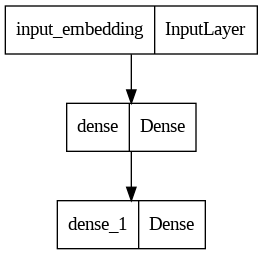

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(my_model)

In [ ]:
my_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer="adam",
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            restore_best_weights=True)


In [ ]:
history = my_model.fit(train_ds,
                       epochs=10,
                       validation_data=val_ds,
                       callbacks=callback)

Epoch 1/10
154/154 [==============================] - 2s 5ms/step - loss: 1.2677 - accuracy: 0.5594 - val_loss: 1.2432 - val_accuracy: 0.5214
Epoch 2/10
154/154 [==============================] - 1s 4ms/step - loss: 0.9365 - accuracy: 0.6625 - val_loss: 1.1734 - val_accuracy: 0.5598
Epoch 3/10
154/154 [==============================] - 0s 3ms/step - loss: 0.8260 - accuracy: 0.6934 - val_loss: 1.2170 - val_accuracy: 0.4876
Epoch 4/10
154/154 [==============================] - 1s 3ms/step - loss: 0.7481 - accuracy: 0.7210 - val_loss: 1.1341 - val_accuracy: 0.5621
Epoch 5/10
154/154 [==============================] - 1s 3ms/step - loss: 0.6770 - accuracy: 0.7410 - val_loss: 1.0920 - val_accuracy: 0.5711
Epoch 6/10
154/154 [==============================] - 1s 3ms/step - loss: 0.6275 - accuracy: 0.7584 - val_loss: 1.1061 - val_accuracy: 0.5485
Epoch 7/10
154/154 [==============================] - 0s 3ms/step - loss: 0.5966 - accuracy: 0.7731 - val_loss: 1.0883 - val_accuracy: 0.6005
Epoch 

In [ ]:
loss, accuracy = my_model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

35/35 [==============================] - 0s 5ms/step - loss: 0.4913 - accuracy: 0.8115
Loss:  0.4912978708744049
Accuracy:  0.811475396156311


In [ ]:
from sklearn.metrics import f1_score, precision_score,recall

In [ ]:
test_labels = []
test_predictions = []

for embeddings, label in test_ds:
    predictions = my_model.predict(embeddings)
    predictions = np.argmax(predictions, axis=1)
    test_labels.extend(label.numpy())
    test_predictions.extend(predictions)
test_labels = np.array(test_labels)
test_predictions = np.array(test_predictions)
f1 = f1_score(test_labels, test_predictions, average='weighted')
precision = precision_score(test_labels, test_predictions, average='weighted')

print("F1 Score: ", f1)
print("Precision: ", precision)

1/1 [==============================] - 0s 67ms/step
F1 Score:  0.8069146115469106
Precision:  0.8180403531622238


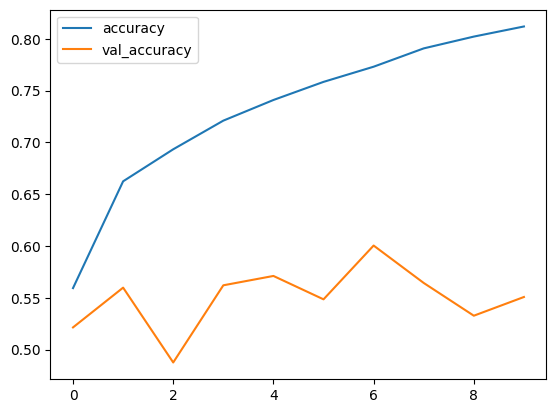

In [ ]:
metrics = history.history
plt.plot(history.epoch, metrics['accuracy'], metrics['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

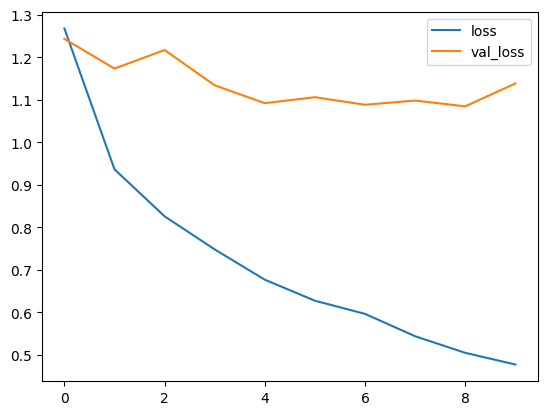

In [ ]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

14/14 [==============================] - 0s 4ms/step
[ 6  7  5  5  4  1  5  7 12 12 12 12 11 12 10 10  9  9  5  5  5  5 10 11
 11 11  1  8  5  5 11 12 12 10  5  2  8  2  2  2  2  2  3  3  3  3  9  7
  7  7 11 11 11 11  8  4  5  4 11 11 12 11 11 11 11  8  9  6 11  5  5  5
  5  7  8  8  5  6  6  6  2  6  4  4  4  4  5  7  5  7  9 12 12 11 11  2
  5  2  7 11 11 11 11  6  1  6  9  4  2  2  2  7  6  1  1  1  6  2  6  4
  2  6  3  6  1  5  4  2  2  4  4  7  4  7  7  7  9  7  7  6  4 11 11 11
 11  7  7  7  7 12 12 12 12  8  4  6  6  7  4  2 11  3  1  1  3 11 11 11
 11 10 10 10 10 11 11 12 11 11 10 10  1  9  9  9  4  5  5  2  2  2  7  8
 11 12 10 10 12 12 12 12  5  5  6  2 12 12 12  9  9  9  9  8  2  6  6 12
 12 12 12 12 12 12 12 12 12 10 10 11 11 10 11 11 11 11 10  3  6  6  2  1
  1  8  8  6  6  6  6  4  4  4  4 12 12 12 12  5  5  8  5  3  3 10 12 10
 10  7  2  2  6  1  4  4  8  7  7  4  7  9  9  6  6  7  2  3  8  8  4 12
 10 10 10  6  6  6  6  5  5  6  5  6  6  7  6  2  2  2  2  3  3  3  3  

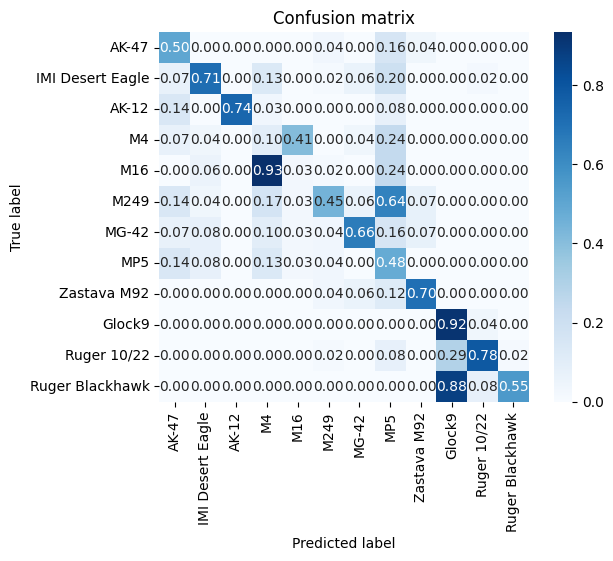

In [ ]:
def show_confusion_matrix(confusion, test_labels):
  """Compute confusion matrix and normalize."""
  confusion_normalized = confusion.astype("float") / confusion.sum(axis=1)
  axis_labels = test_labels
  ax = sns.heatmap(
      confusion_normalized, xticklabels=axis_labels, yticklabels=axis_labels,
      cmap='Blues', annot=True, fmt='.2f', square=True)
  plt.title("Confusion matrix")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

# Get the result of the dataset
result = my_model.predict(val_ds)
result = np.argmax(result, axis=1)
print(result)

total = []
for element in val_ds.as_numpy_iterator():
  total.append(element[1])

all_total = np.concatenate(total)
print(all_total)
matrix = confusion_matrix(result, all_total)
print(matrix)
print()

# Print confusion matrix with Matplotlib and extra function
show_confusion_matrix(matrix, my_class)

In [ ]:
testing_wav_data = load_wav_16k_mono('/content/4 (95).wav')


In [ ]:
scores, embeddings, spectrogram = yamnet_model(testing_wav_data)
result = my_model(embeddings).numpy()

inferred_class = my_class[result.mean(axis=0).argmax()]
print(f'The main sound is: {inferred_class}')

The main sound is: M249


# RMSProp

In [ ]:
import keras.backend as K
K.clear_session()
my_modelr = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024),
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(13)
], name='my_model')

my_modelb.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 13)                6669      
                                                                 
Total params: 531,469
Trainable params: 531,469
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_modelr.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer="RMSprop",
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            restore_best_weights=True)

In [ ]:
history = my_modelr.fit(train_ds,
                       epochs=10,
                       validation_data=val_ds,
                       callbacks=callback)

Epoch 1/10
154/154 [==============================] - 1s 4ms/step - loss: 1.2212 - accuracy: 0.5740 - val_loss: 1.3842 - val_accuracy: 0.4582
Epoch 2/10
154/154 [==============================] - 1s 3ms/step - loss: 0.9382 - accuracy: 0.6539 - val_loss: 1.2608 - val_accuracy: 0.4898
Epoch 3/10
154/154 [==============================] - 0s 3ms/step - loss: 0.8373 - accuracy: 0.6887 - val_loss: 1.1687 - val_accuracy: 0.5485
Epoch 4/10
154/154 [==============================] - 1s 3ms/step - loss: 0.7659 - accuracy: 0.7102 - val_loss: 1.2088 - val_accuracy: 0.5237
Epoch 5/10
154/154 [==============================] - 0s 3ms/step - loss: 0.7135 - accuracy: 0.7290 - val_loss: 1.0647 - val_accuracy: 0.5508
Epoch 6/10
154/154 [==============================] - 0s 3ms/step - loss: 0.6623 - accuracy: 0.7497 - val_loss: 1.1138 - val_accuracy: 0.5327
Epoch 7/10
154/154 [==============================] - 0s 3ms/step - loss: 0.6096 - accuracy: 0.7719 - val_loss: 1.0825 - val_accuracy: 0.5711
Epoch 

In [ ]:
loss, accuracy = my_modelr.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

35/35 [==============================] - 0s 3ms/step - loss: 0.5089 - accuracy: 0.8142
Loss:  0.5089255571365356
Accuracy:  0.8142076730728149


In [ ]:
test_labels = []
test_predictions = []

for embeddings, label in test_ds:
    predictions = my_modelr.predict(embeddings)
    predictions = np.argmax(predictions, axis=1)
    test_labels.extend(label.numpy())
    test_predictions.extend(predictions)
test_labels = np.array(test_labels)
test_predictions = np.array(test_predictions)
f1 = f1_score(test_labels, test_predictions, average='weighted')
precision = precision_score(test_labels, test_predictions, average='weighted')

print("F1 Score: ", f1)
print("Precision: ", precision)

1/1 [==============================] - 0s 72ms/step
F1 Score:  0.8057021355084956
Precision:  0.8079557381539905


# adagrad

In [ ]:
import keras.backend as K
K.clear_session()
my_modela = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024),
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(13)
], name='my_model')

my_modelb.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 13)                6669      
                                                                 
Total params: 531,469
Trainable params: 531,469
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_modela.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer="adagrad",
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            restore_best_weights=True)

In [ ]:
history = my_modela.fit(train_ds,
                       epochs=10,
                       validation_data=val_ds,
                       callbacks=callback)

Epoch 1/10
154/154 [==============================] - 2s 4ms/step - loss: 2.0440 - accuracy: 0.3534 - val_loss: 2.2741 - val_accuracy: 0.1558
Epoch 2/10
154/154 [==============================] - 0s 3ms/step - loss: 1.7296 - accuracy: 0.4486 - val_loss: 2.0931 - val_accuracy: 0.2167
Epoch 3/10
154/154 [==============================] - 0s 3ms/step - loss: 1.5897 - accuracy: 0.4894 - val_loss: 1.9867 - val_accuracy: 0.2731
Epoch 4/10
154/154 [==============================] - 0s 3ms/step - loss: 1.4975 - accuracy: 0.5130 - val_loss: 1.8954 - val_accuracy: 0.3228
Epoch 5/10
154/154 [==============================] - 0s 3ms/step - loss: 1.4315 - accuracy: 0.5319 - val_loss: 1.8388 - val_accuracy: 0.3431
Epoch 6/10
154/154 [==============================] - 0s 3ms/step - loss: 1.3806 - accuracy: 0.5417 - val_loss: 1.7918 - val_accuracy: 0.3544
Epoch 7/10
154/154 [==============================] - 0s 3ms/step - loss: 1.3391 - accuracy: 0.5539 - val_loss: 1.7460 - val_accuracy: 0.3815
Epoch 

In [ ]:
loss, accuracy = my_modela.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

35/35 [==============================] - 0s 4ms/step - loss: 0.9096 - accuracy: 0.7350
Loss:  0.9095879793167114
Accuracy:  0.7349726557731628


In [ ]:
test_labels = []
test_predictions = []

for embeddings, label in test_ds:
    predictions = my_modela.predict(embeddings)
    predictions = np.argmax(predictions, axis=1)
    test_labels.extend(label.numpy())
    test_predictions.extend(predictions)
test_labels = np.array(test_labels)
test_predictions = np.array(test_predictions)
f1 = f1_score(test_labels, test_predictions, average='weighted')
precision = precision_score(test_labels, test_predictions, average='weighted')

print("F1 Score: ", f1)
print("Precision: ", precision)

1/1 [==============================] - 0s 89ms/step
F1 Score:  0.7022945951202838
Precision:  0.722597094901312


# SGD

In [ ]:
import keras.backend as K
K.clear_session()
my_models = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024),
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(13)
], name='my_model')

my_models.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 13)                6669      
                                                                 
Total params: 531,469
Trainable params: 531,469
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import SGD

my_models.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer=SGD(learning_rate=0.005, momentum=0.8),
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            restore_best_weights=True)

In [ ]:
history = my_models.fit(train_ds,
                       epochs=10,
                       validation_data=val_ds,
                       callbacks=callback)

Epoch 1/10
154/154 [==============================] - 3s 12ms/step - loss: 1.5402 - accuracy: 0.4845 - val_loss: 1.7800 - val_accuracy: 0.3499
Epoch 2/10
154/154 [==============================] - 1s 5ms/step - loss: 1.1651 - accuracy: 0.5919 - val_loss: 1.5123 - val_accuracy: 0.4424
Epoch 3/10
154/154 [==============================] - 1s 5ms/step - loss: 1.0627 - accuracy: 0.6200 - val_loss: 1.3889 - val_accuracy: 0.4537
Epoch 4/10
154/154 [==============================] - 1s 4ms/step - loss: 1.0051 - accuracy: 0.6417 - val_loss: 1.2809 - val_accuracy: 0.4853
Epoch 5/10
154/154 [==============================] - 1s 3ms/step - loss: 0.9551 - accuracy: 0.6517 - val_loss: 1.2406 - val_accuracy: 0.5463
Epoch 6/10
154/154 [==============================] - 0s 3ms/step - loss: 0.9296 - accuracy: 0.6665 - val_loss: 1.2767 - val_accuracy: 0.4966
Epoch 7/10
154/154 [==============================] - 0s 3ms/step - loss: 0.8928 - accuracy: 0.6734 - val_loss: 1.2226 - val_accuracy: 0.5124
Epoch

In [ ]:
loss, accuracy = my_models.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

35/35 [==============================] - 0s 8ms/step - loss: 0.5693 - accuracy: 0.7987
Loss:  0.5692723989486694
Accuracy:  0.7987249493598938


In [ ]:
test_labels = []
test_predictions = []

for embeddings, label in test_ds:
    predictions = my_models.predict(embeddings)
    predictions = np.argmax(predictions, axis=1)
    test_labels.extend(label.numpy())
    test_predictions.extend(predictions)
test_labels = np.array(test_labels)
test_predictions = np.array(test_predictions)
f1 = f1_score(test_labels, test_predictions, average='weighted')
precision = precision_score(test_labels, test_predictions, average='weighted')

print("F1 Score: ", f1)
print("Precision: ", precision)

1/1 [==============================] - 0s 44ms/step
F1 Score:  0.7814892000495376
Precision:  0.7708773034291085


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Adammax

In [ ]:
import keras.backend as K
K.clear_session()
my_modelax = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024),
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(13)
], name='my_model')

my_models.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 13)                6669      
                                                                 
Total params: 531,469
Trainable params: 531,469
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_modelax.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer="Adamax",
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            restore_best_weights=True)

In [ ]:
history = my_modelax.fit(train_ds,
                       epochs=10,
                       validation_data=val_ds,
                       callbacks=callback)

Epoch 1/10
154/154 [==============================] - 2s 7ms/step - loss: 1.3716 - accuracy: 0.5409 - val_loss: 1.5259 - val_accuracy: 0.4108
Epoch 2/10
154/154 [==============================] - 1s 5ms/step - loss: 1.0511 - accuracy: 0.6253 - val_loss: 1.3468 - val_accuracy: 0.4876
Epoch 3/10
154/154 [==============================] - 1s 5ms/step - loss: 0.9571 - accuracy: 0.6635 - val_loss: 1.2558 - val_accuracy: 0.5124
Epoch 4/10
154/154 [==============================] - 1s 5ms/step - loss: 0.8970 - accuracy: 0.6747 - val_loss: 1.2285 - val_accuracy: 0.5169
Epoch 5/10
154/154 [==============================] - 1s 6ms/step - loss: 0.8508 - accuracy: 0.6940 - val_loss: 1.1652 - val_accuracy: 0.5440
Epoch 6/10
154/154 [==============================] - 1s 5ms/step - loss: 0.8111 - accuracy: 0.7074 - val_loss: 1.1709 - val_accuracy: 0.5169
Epoch 7/10
154/154 [==============================] - 1s 6ms/step - loss: 0.7822 - accuracy: 0.7163 - val_loss: 1.1324 - val_accuracy: 0.5485
Epoch 

In [ ]:
loss, accuracy = my_modelax.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

35/35 [==============================] - 0s 8ms/step - loss: 0.5160 - accuracy: 0.8260
Loss:  0.5160312056541443
Accuracy:  0.8260473608970642


In [ ]:
test_labels = []
test_predictions = []

for embeddings, label in test_ds:
    predictions = my_modelax.predict(embeddings)
    predictions = np.argmax(predictions, axis=1)
    test_labels.extend(label.numpy())
    test_predictions.extend(predictions)
test_labels = np.array(test_labels)
test_predictions = np.array(test_predictions)
f1 = f1_score(test_labels, test_predictions, average='weighted')
precision = precision_score(test_labels, test_predictions, average='weighted')

print("F1 Score: ", f1)
print("Precision: ", precision)

1/1 [==============================] - 0s 59ms/step
F1 Score:  0.8149584167520382
Precision:  0.8140200899509646


# adadelta


In [ ]:
import keras.backend as K
K.clear_session()
my_modeld = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024),
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(13)
], name='my_model')

my_models.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 13)                6669      
                                                                 
Total params: 531,469
Trainable params: 531,469
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_modeld.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer="Adadelta",
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            restore_best_weights=True)

In [ ]:
history = my_modeld.fit(train_ds,
                       epochs=10,
                       validation_data=val_ds,
                       callbacks=callback)

Epoch 1/10
154/154 [==============================] - 2s 4ms/step - loss: 2.7778 - accuracy: 0.0504 - val_loss: 2.6765 - val_accuracy: 0.0587
Epoch 2/10
154/154 [==============================] - 0s 3ms/step - loss: 2.7002 - accuracy: 0.0588 - val_loss: 2.6562 - val_accuracy: 0.0655
Epoch 3/10
154/154 [==============================] - 0s 3ms/step - loss: 2.6331 - accuracy: 0.0720 - val_loss: 2.6383 - val_accuracy: 0.0677
Epoch 4/10
154/154 [==============================] - 1s 3ms/step - loss: 2.5735 - accuracy: 0.1017 - val_loss: 2.6224 - val_accuracy: 0.0587
Epoch 5/10
154/154 [==============================] - 0s 3ms/step - loss: 2.5201 - accuracy: 0.1543 - val_loss: 2.6085 - val_accuracy: 0.0474
Epoch 6/10
154/154 [==============================] - 0s 3ms/step - loss: 2.4723 - accuracy: 0.2107 - val_loss: 2.5960 - val_accuracy: 0.0474
Epoch 7/10
154/154 [==============================] - 1s 4ms/step - loss: 2.4287 - accuracy: 0.2493 - val_loss: 2.5846 - val_accuracy: 0.0406
Epoch 

In [ ]:
loss, accuracy = my_modeld.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

35/35 [==============================] - 0s 6ms/step - loss: 2.0529 - accuracy: 0.5929
Loss:  2.052928924560547
Accuracy:  0.5928961634635925


In [ ]:
test_labels = []
test_predictions = []

for embeddings, label in test_ds:
    predictions = my_modeld.predict(embeddings)
    predictions = np.argmax(predictions, axis=1)
    test_labels.extend(label.numpy())
    test_predictions.extend(predictions)
test_labels = np.array(test_labels)
test_predictions = np.array(test_predictions)
f1 = f1_score(test_labels, test_predictions, average='weighted')
precision = precision_score(test_labels, test_predictions, average='weighted')

print("F1 Score: ", f1)
print("Precision: ", precision)

1/1 [==============================] - 0s 176ms/step
F1 Score:  0.5014378005423973
Precision:  0.4367182887118761


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Ftrl

In [ ]:
import keras.backend as K
K.clear_session()
my_modelf = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024),
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(13)
], name='my_model')

my_models.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 13)                6669      
                                                                 
Total params: 531,469
Trainable params: 531,469
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_modelf.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer="Ftrl",
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            restore_best_weights=True)

In [ ]:
history = my_modelf.fit(train_ds,
                       epochs=10,
                       validation_data=val_ds,
                       callbacks=callback)

Epoch 1/10
154/154 [==============================] - 2s 4ms/step - loss: 2.5612 - accuracy: 0.3383 - val_loss: 2.5646 - val_accuracy: 0.0316
Epoch 2/10
154/154 [==============================] - 1s 4ms/step - loss: 2.5494 - accuracy: 0.3392 - val_loss: 2.5646 - val_accuracy: 0.0316
Epoch 3/10
154/154 [==============================] - 1s 5ms/step - loss: 2.5180 - accuracy: 0.3392 - val_loss: 2.5680 - val_accuracy: 0.0316
Epoch 4/10
154/154 [==============================] - 1s 5ms/step - loss: 2.4240 - accuracy: 0.3392 - val_loss: 2.5999 - val_accuracy: 0.0316
Epoch 5/10
154/154 [==============================] - 1s 5ms/step - loss: 2.3069 - accuracy: 0.3392 - val_loss: 2.6653 - val_accuracy: 0.0316
Epoch 6/10
154/154 [==============================] - 1s 7ms/step - loss: 2.2477 - accuracy: 0.3392 - val_loss: 2.6855 - val_accuracy: 0.0316
Epoch 7/10
154/154 [==============================] - 1s 9ms/step - loss: 2.2077 - accuracy: 0.3392 - val_loss: 2.6787 - val_accuracy: 0.0316
Epoch 

In [ ]:
loss, accuracy = my_modelf.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

35/35 [==============================] - 0s 6ms/step - loss: 1.5822 - accuracy: 0.6302
Loss:  1.5821824073791504
Accuracy:  0.630236804485321


In [ ]:
test_labels = []
test_predictions = []

for embeddings, label in test_ds:
    predictions = my_modelf.predict(embeddings)
    predictions = np.argmax(predictions, axis=1)
    test_labels.extend(label.numpy())
    test_predictions.extend(predictions)
test_labels = np.array(test_labels)
test_predictions = np.array(test_predictions)
f1 = f1_score(test_labels, test_predictions, average='weighted')
precision = precision_score(test_labels, test_predictions, average='weighted')

print("F1 Score: ", f1)
print("Precision: ", precision)

1/1 [==============================] - 0s 69ms/step
F1 Score:  0.4872892308005413
Precision:  0.39719841672721723


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# adam with beta

In [ ]:
import keras.backend as K
K.clear_session()
my_modelab = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024),
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(13)
], name='my_model')

my_modelab.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 13)                6669      
                                                                 
Total params: 531,469
Trainable params: 531,469
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_modelab.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.002, beta_1=0.92),
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            restore_best_weights=True)

In [ ]:
history = my_modelab.fit(train_ds,
                       epochs=10,
                       validation_data=val_ds,
                       callbacks=callback)

Epoch 1/10
154/154 [==============================] - 2s 5ms/step - loss: 1.2361 - accuracy: 0.5681 - val_loss: 1.4340 - val_accuracy: 0.4808
Epoch 2/10
154/154 [==============================] - 1s 3ms/step - loss: 0.9638 - accuracy: 0.6519 - val_loss: 1.2228 - val_accuracy: 0.5260
Epoch 3/10
154/154 [==============================] - 1s 3ms/step - loss: 0.8481 - accuracy: 0.6834 - val_loss: 1.1099 - val_accuracy: 0.5688
Epoch 4/10
154/154 [==============================] - 1s 3ms/step - loss: 0.8050 - accuracy: 0.7035 - val_loss: 1.0972 - val_accuracy: 0.6027
Epoch 5/10
154/154 [==============================] - 1s 3ms/step - loss: 0.7128 - accuracy: 0.7279 - val_loss: 1.0709 - val_accuracy: 0.6185
Epoch 6/10
154/154 [==============================] - 1s 3ms/step - loss: 0.6747 - accuracy: 0.7477 - val_loss: 1.1020 - val_accuracy: 0.5485
Epoch 7/10
154/154 [==============================] - 1s 3ms/step - loss: 0.6411 - accuracy: 0.7631 - val_loss: 1.0620 - val_accuracy: 0.5847
Epoch 

In [ ]:
loss, accuracy = my_modelab.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

35/35 [==============================] - 0s 11ms/step - loss: 0.4970 - accuracy: 0.8106
Loss:  0.49703407287597656
Accuracy:  0.8105646371841431


In [ ]:
test_labels = []
test_predictions = []

for embeddings, label in test_ds:
    predictions = my_modelab.predict(embeddings)
    predictions = np.argmax(predictions, axis=1)
    test_labels.extend(label.numpy())
    test_predictions.extend(predictions)
test_labels = np.array(test_labels)
test_predictions = np.array(test_predictions)
f1 = f1_score(test_labels, test_predictions, average='weighted')
precision = precision_score(test_labels, test_predictions, average='weighted')

print("F1 Score: ", f1)
print("Precision: ", precision)

1/1 [==============================] - 0s 70ms/step
F1 Score:  0.8110797062367098
Precision:  0.8170069896202237


# layers rerlu-relu-elu-relu


In [ ]:
K.clear_session()
my_model1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024),
                          name='input_embedding'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='ELU'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(13)
], name='my_model')

my_model1.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 13)                6669      
                                                                 
Total params: 925,965
Trainable params: 925,965
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer="adam",
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            restore_best_weights=True)

In [ ]:
history = my_model1.fit(train_ds,
                       epochs=20,
                       callbacks=callback)

Epoch 1/20
154/154 [==============================] - 4s 7ms/step - loss: 1.2235 - accuracy: 0.5600
Epoch 2/20
154/154 [==============================] - 1s 7ms/step - loss: 0.9351 - accuracy: 0.6431
Epoch 3/20
154/154 [==============================] - 1s 8ms/step - loss: 0.8146 - accuracy: 0.6783
Epoch 4/20
154/154 [==============================] - 1s 7ms/step - loss: 0.7410 - accuracy: 0.7096
Epoch 5/20
154/154 [==============================] - 1s 8ms/step - loss: 0.6489 - accuracy: 0.7349
Epoch 6/20
154/154 [==============================] - 1s 8ms/step - loss: 0.5832 - accuracy: 0.7599
Epoch 7/20
154/154 [==============================] - 1s 5ms/step - loss: 0.5210 - accuracy: 0.7812
Epoch 8/20
154/154 [==============================] - 1s 4ms/step - loss: 0.4858 - accuracy: 0.7942
Epoch 9/20
154/154 [==============================] - 1s 3ms/step - loss: 0.4451 - accuracy: 0.8089
Epoch 10/20
154/154 [==============================] - 1s 3ms/step - loss: 0.4086 - accuracy: 0.8209

In [ ]:
loss, accuracy = my_model1.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

35/35 [==============================] - 0s 4ms/step - loss: 0.7956 - accuracy: 0.8215
Loss:  0.7955908179283142
Accuracy:  0.8214936256408691


# Layers relu-dropout-relu-relu-relu-softmax


In [ ]:
K.clear_session()
my_modell2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024),
                          name='input_embedding'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(13,activation='softmax')
], name='my_model')

my_modell2.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 13)                6669      
                                                                 
Total params: 729,101
Trainable params: 729,101
Non-traina

In [ ]:
my_modell2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer="adam",
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            restore_best_weights=True)

In [ ]:
history = my_modell2.fit(train_ds,
                       epochs=10,
                       callbacks=callback)

Epoch 1/10
154/154 [==============================] - 2s 4ms/step - loss: 1.3189 - accuracy: 0.5258
Epoch 2/10
154/154 [==============================] - 1s 5ms/step - loss: 1.0225 - accuracy: 0.6019
Epoch 3/10
154/154 [==============================] - 1s 6ms/step - loss: 0.9420 - accuracy: 0.6444
Epoch 4/10
154/154 [==============================] - 1s 5ms/step - loss: 0.8432 - accuracy: 0.6686
Epoch 5/10
154/154 [==============================] - 1s 4ms/step - loss: 0.7777 - accuracy: 0.6869
Epoch 6/10
154/154 [==============================] - 1s 3ms/step - loss: 0.7048 - accuracy: 0.7233
Epoch 7/10
154/154 [==============================] - 1s 3ms/step - loss: 0.6960 - accuracy: 0.7304
Epoch 8/10
154/154 [==============================] - 1s 4ms/step - loss: 0.6333 - accuracy: 0.7440
Epoch 9/10
154/154 [==============================] - 1s 3ms/step - loss: 0.6446 - accuracy: 0.7578
Epoch 10/10
154/154 [==============================] - 1s 4ms/step - loss: 0.5502 - accuracy: 0.7753

In [ ]:
loss, accuracy = my_modell2.evaluate(test_ds)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

35/35 [==============================] - 0s 4ms/step - loss: 0.5247 - accuracy: 0.8206
Loss:  0.5247493982315063
Accuracy:  0.8205828666687012


# tanh

In [ ]:
K.clear_session()
my_model4 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024),
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='tanh'),
    tf.keras.layers.Dense(13)
], name='my_model4')

my_model4.summary()

Model: "my_model4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 13)                6669      
                                                                 
Total params: 531,469
Trainable params: 531,469
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_model4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer="adam",
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            restore_best_weights=True)

In [ ]:
history = my_model4.fit(train_ds,
                       epochs=10,
                       validation_data=val_ds,
                       callbacks=callback)

Epoch 1/10
154/154 [==============================] - 2s 6ms/step - loss: 1.2126 - accuracy: 0.5712 - val_loss: 1.3165 - val_accuracy: 0.5034
Epoch 2/10
154/154 [==============================] - 0s 3ms/step - loss: 0.9330 - accuracy: 0.6486 - val_loss: 1.1586 - val_accuracy: 0.5621
Epoch 3/10
154/154 [==============================] - 0s 3ms/step - loss: 0.8666 - accuracy: 0.6741 - val_loss: 1.1501 - val_accuracy: 0.5508
Epoch 4/10
154/154 [==============================] - 0s 3ms/step - loss: 0.7903 - accuracy: 0.6976 - val_loss: 1.1764 - val_accuracy: 0.5327
Epoch 5/10
154/154 [==============================] - 1s 3ms/step - loss: 0.7522 - accuracy: 0.7151 - val_loss: 1.1914 - val_accuracy: 0.5305
Epoch 6/10
154/154 [==============================] - 1s 3ms/step - loss: 0.7187 - accuracy: 0.7241 - val_loss: 1.2049 - val_accuracy: 0.5598
Epoch 7/10
154/154 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.7349 - val_loss: 1.2164 - val_accuracy: 0.5418
Epoch 

In [ ]:
loss, accuracy = my_model4.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

35/35 [==============================] - 0s 7ms/step - loss: 0.5226 - accuracy: 0.7978
Loss:  0.5226207971572876
Accuracy:  0.7978141903877258


# Droupout 0.2

In [ ]:
K.clear_session()
my_modelD = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024),
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(13)
], name='my_modelD')
my_modelD.summary()

Model: "my_modelD"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 13)                6669      
                                                                 
Total params: 531,469
Trainable params: 531,469
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_modelD.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer="adam",
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            restore_best_weights=True)

In [ ]:
history = my_modelD.fit(train_ds,
                       epochs=10,
                       validation_data=val_ds,
                       callbacks=callback)

Epoch 1/10
154/154 [==============================] - 2s 6ms/step - loss: 1.2836 - accuracy: 0.5482 - val_loss: 1.3563 - val_accuracy: 0.4515
Epoch 2/10
154/154 [==============================] - 1s 5ms/step - loss: 0.9604 - accuracy: 0.6456 - val_loss: 1.2017 - val_accuracy: 0.5260
Epoch 3/10
154/154 [==============================] - 1s 5ms/step - loss: 0.8718 - accuracy: 0.6822 - val_loss: 1.2068 - val_accuracy: 0.4831
Epoch 4/10
154/154 [==============================] - 1s 5ms/step - loss: 0.7910 - accuracy: 0.7025 - val_loss: 1.0711 - val_accuracy: 0.6095
Epoch 5/10
154/154 [==============================] - 1s 5ms/step - loss: 0.7381 - accuracy: 0.7267 - val_loss: 1.0556 - val_accuracy: 0.5914
Epoch 6/10
154/154 [==============================] - 1s 4ms/step - loss: 0.7096 - accuracy: 0.7332 - val_loss: 1.0866 - val_accuracy: 0.5847
Epoch 7/10
154/154 [==============================] - 1s 3ms/step - loss: 0.6525 - accuracy: 0.7485 - val_loss: 1.0827 - val_accuracy: 0.6050
Epoch 

In [ ]:
loss, accuracy = my_modelD.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

35/35 [==============================] - 0s 10ms/step - loss: 0.4697 - accuracy: 0.8215
Loss:  0.4696539640426636
Accuracy:  0.8214936256408691


In [ ]:
test_labels = []
test_predictions = []

for embeddings, label in test_ds:
    predictions = my_modelD.predict(embeddings)
    predictions = np.argmax(predictions, axis=1)
    test_labels.extend(label.numpy())
    test_predictions.extend(predictions)
test_labels = np.array(test_labels)
test_predictions = np.array(test_predictions)
f1 = f1_score(test_labels, test_predictions, average='weighted')
precision = precision_score(test_labels, test_predictions, average='weighted')

print("F1 Score: ", f1)
print("Precision: ", precision)

1/1 [==============================] - 0s 49ms/step
F1 Score:  0.8179904231474111
Precision:  0.8257339739173055


# Dropout 0.5

In [ ]:
K.clear_session()
my_modelD = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024),
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(13)
], name='my_modelD')
my_modelD.summary()

Model: "my_modelD"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 13)                6669      
                                                                 
Total params: 531,469
Trainable params: 531,469
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_modelD.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer="adam",
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            restore_best_weights=True)

In [ ]:
history = my_modelD.fit(train_ds,
                       epochs=10,
                       validation_data=val_ds,
                       callbacks=callback)

Epoch 1/10
154/154 [==============================] - 2s 6ms/step - loss: 1.3785 - accuracy: 0.5329 - val_loss: 1.3921 - val_accuracy: 0.4831
Epoch 2/10
154/154 [==============================] - 0s 3ms/step - loss: 1.0455 - accuracy: 0.6246 - val_loss: 1.2319 - val_accuracy: 0.5034
Epoch 3/10
154/154 [==============================] - 0s 3ms/step - loss: 1.0095 - accuracy: 0.6499 - val_loss: 1.2202 - val_accuracy: 0.4898
Epoch 4/10
154/154 [==============================] - 1s 3ms/step - loss: 0.8992 - accuracy: 0.6700 - val_loss: 1.1272 - val_accuracy: 0.5643
Epoch 5/10
154/154 [==============================] - 0s 3ms/step - loss: 0.8441 - accuracy: 0.6873 - val_loss: 1.0727 - val_accuracy: 0.5801
Epoch 6/10
154/154 [==============================] - 1s 3ms/step - loss: 0.8267 - accuracy: 0.6974 - val_loss: 1.1068 - val_accuracy: 0.5688
Epoch 7/10
154/154 [==============================] - 0s 3ms/step - loss: 0.7776 - accuracy: 0.7062 - val_loss: 1.1076 - val_accuracy: 0.5440
Epoch 

In [ ]:
loss, accuracy = my_modelD.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

35/35 [==============================] - 0s 3ms/step - loss: 0.4848 - accuracy: 0.8169
Loss:  0.4847584366798401
Accuracy:  0.8169398903846741


In [ ]:
test_labels = []
test_predictions = []

for embeddings, label in test_ds:
    predictions = my_modelD.predict(embeddings)
    predictions = np.argmax(predictions, axis=1)
    test_labels.extend(label.numpy())
    test_predictions.extend(predictions)
test_labels = np.array(test_labels)
test_predictions = np.array(test_predictions)
f1 = f1_score(test_labels, test_predictions, average='weighted')
precision = precision_score(test_labels, test_predictions, average='weighted')

print("F1 Score: ", f1)
print("Precision: ", precision)

1/1 [==============================] - 0s 78ms/step
F1 Score:  0.807037529814652
Precision:  0.8094022244215685


# Dropout 0.8

In [ ]:
K.clear_session()
my_modelD = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024),
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(13)
], name='my_modelD')
my_modelD.summary()

Model: "my_modelD"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 13)                6669      
                                                                 
Total params: 531,469
Trainable params: 531,469
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_modelD.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer="adam",
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            restore_best_weights=True)

In [ ]:
history = my_modelD.fit(train_ds,
                       epochs=10,
                       validation_data=val_ds,
                       callbacks=callback)

Epoch 1/10
154/154 [==============================] - 1s 4ms/step - loss: 1.2635 - accuracy: 0.5681 - val_loss: 1.3769 - val_accuracy: 0.4402
Epoch 2/10
154/154 [==============================] - 0s 3ms/step - loss: 0.9585 - accuracy: 0.6529 - val_loss: 1.1961 - val_accuracy: 0.5124
Epoch 3/10
154/154 [==============================] - 1s 3ms/step - loss: 0.8465 - accuracy: 0.6899 - val_loss: 1.1025 - val_accuracy: 0.5801
Epoch 4/10
154/154 [==============================] - 0s 3ms/step - loss: 0.7689 - accuracy: 0.7121 - val_loss: 1.1152 - val_accuracy: 0.5372
Epoch 5/10
154/154 [==============================] - 1s 4ms/step - loss: 0.7070 - accuracy: 0.7371 - val_loss: 1.1226 - val_accuracy: 0.5711
Epoch 6/10
154/154 [==============================] - 0s 3ms/step - loss: 0.6624 - accuracy: 0.7456 - val_loss: 1.0976 - val_accuracy: 0.5418
Epoch 7/10
154/154 [==============================] - 1s 4ms/step - loss: 0.6198 - accuracy: 0.7647 - val_loss: 1.0886 - val_accuracy: 0.5485
Epoch 

In [ ]:
loss, accuracy = my_modelD.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

35/35 [==============================] - 0s 3ms/step - loss: 0.4752 - accuracy: 0.8215
Loss:  0.4752208888530731
Accuracy:  0.8214936256408691


In [ ]:
test_labels = []
test_predictions = []

for embeddings, label in test_ds:
    predictions = my_modelD.predict(embeddings)
    predictions = np.argmax(predictions, axis=1)
    test_labels.extend(label.numpy())
    test_predictions.extend(predictions)
test_labels = np.array(test_labels)
test_predictions = np.array(test_predictions)
f1 = f1_score(test_labels, test_predictions, average='weighted')
precision = precision_score(test_labels, test_predictions, average='weighted')

print("F1 Score: ", f1)
print("Precision: ", precision)

1/1 [==============================] - 0s 122ms/step
F1 Score:  0.8181649922809869
Precision:  0.8207025473757724


# kullback_leibler


In [ ]:
import keras.backend as K
K.clear_session()

In [ ]:
my_model3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024),
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(13)
], name='my_model')

my_model3.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 13)                6669      
                                                                 
Total params: 531,469
Trainable params: 531,469
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_model3.compile(loss=tf.keras.losses.kullback_leibler_divergence,
                 optimizer="adam",
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            restore_best_weights=True)

In [ ]:
history = my_model3.fit(train_ds,
                       epochs=10,
                       validation_data=val_ds,
                       callbacks=callback)

Epoch 1/10
154/154 [==============================] - 2s 5ms/step - loss: 2.7060 - accuracy: 0.0313 - val_loss: 0.0000e+00 - val_accuracy: 0.0271
Epoch 2/10
154/154 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0327 - val_loss: 0.0000e+00 - val_accuracy: 0.0271
Epoch 3/10
154/154 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0327 - val_loss: 0.0000e+00 - val_accuracy: 0.0271
Epoch 4/10
154/154 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0327 - val_loss: 0.0000e+00 - val_accuracy: 0.0271
Epoch 5/10
154/154 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0327 - val_loss: 0.0000e+00 - val_accuracy: 0.0271


In [ ]:
loss, accuracy = my_model3.evaluate(test_ds)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

35/35 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0255
Loss:  0.0
Accuracy:  0.025500910356640816


In [ ]:
test_labels = []
test_predictions = []

for embeddings, label in test_ds:
    predictions = my_model3.predict(embeddings)
    predictions = np.argmax(predictions, axis=1)
    test_labels.extend(label.numpy())
    test_predictions.extend(predictions)
test_labels = np.array(test_labels)
test_predictions = np.array(test_predictions)
f1 = f1_score(test_labels, test_predictions, average='weighted')
precision = precision_score(test_labels, test_predictions, average='weighted')

print("F1 Score: ", f1)
print("Precision: ", precision)

1/1 [==============================] - 0s 65ms/step
F1 Score:  0.006184981890205622
Precision:  0.0046867428509457364


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


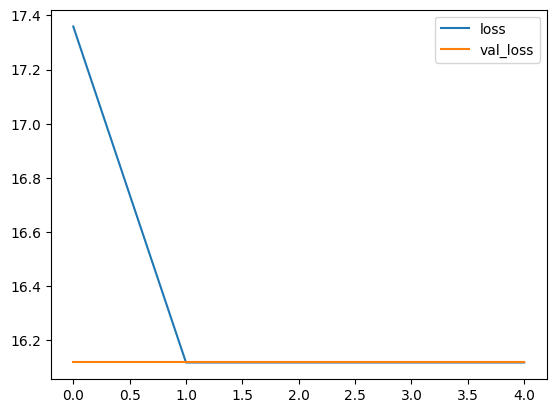

In [ ]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

# squared_hinge

In [ ]:
import keras.backend as K
K.clear_session()

In [ ]:
my_model5 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024),
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(13)
], name='my_model')

my_model5.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 13)                6669      
                                                                 
Total params: 531,469
Trainable params: 531,469
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_model5.compile(loss=tf.keras.losses.squared_hinge,
                 optimizer="adam",
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            restore_best_weights=True)

In [ ]:
history = my_model5.fit(train_ds,
                       epochs=10,
                       validation_data=val_ds,
                       callbacks=callback)

Epoch 1/10
154/154 [==============================] - 4s 9ms/step - loss: 0.0235 - accuracy: 0.0333 - val_loss: 2.4539e-07 - val_accuracy: 0.0316
Epoch 2/10
154/154 [==============================] - 1s 6ms/step - loss: 1.6894e-06 - accuracy: 0.0344 - val_loss: 1.1982e-09 - val_accuracy: 0.0316
Epoch 3/10
154/154 [==============================] - 1s 3ms/step - loss: 4.8307e-07 - accuracy: 0.0352 - val_loss: 0.0000e+00 - val_accuracy: 0.0339
Epoch 4/10
154/154 [==============================] - 1s 4ms/step - loss: 4.3377e-08 - accuracy: 0.0362 - val_loss: 0.0000e+00 - val_accuracy: 0.0293
Epoch 5/10
154/154 [==============================] - 1s 4ms/step - loss: 8.8641e-10 - accuracy: 0.0360 - val_loss: 0.0000e+00 - val_accuracy: 0.0271
Epoch 6/10
154/154 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0360 - val_loss: 0.0000e+00 - val_accuracy: 0.0271
Epoch 7/10
154/154 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0360 

In [ ]:
loss, accuracy = my_model5.evaluate(test_ds)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

35/35 [==============================] - 0s 3ms/step - loss: 1.1240e-07 - accuracy: 0.0355
Loss:  1.1239905717275178e-07
Accuracy:  0.03551912680268288


In [ ]:
test_labels = []
test_predictions = []

for embeddings, label in test_ds:
    predictions = my_model5.predict(embeddings)
    predictions = np.argmax(predictions, axis=1)
    test_labels.extend(label.numpy())
    test_predictions.extend(predictions)
test_labels = np.array(test_labels)
test_predictions = np.array(test_predictions)
f1 = f1_score(test_labels, test_predictions, average='weighted')
precision = precision_score(test_labels, test_predictions, average='weighted')

print("F1 Score: ", f1)
print("Precision: ", precision)

1/1 [==============================] - 0s 257ms/step
F1 Score:  0.007829713806678441
Precision:  0.0046298518363416166


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# categorial


In [ ]:
my_model6 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024),
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(13)
], name='my_model')

my_model6.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 13)                6669      
                                                                 
Total params: 531,469
Trainable params: 531,469
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_model6.compile(loss=tf.keras.losses.CategoricalCrossentropy,
                 optimizer="adam",
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            restore_best_weights=True)

In [ ]:
history = my_model6.fit(train_ds,
                       epochs=10,
                       validation_data=val_ds,
                       callbacks=callback)

Epoch 1/10


TypeError: ignored

In [ ]:
loss, accuracy = my_model6.evaluate(test_ds)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

TypeError: ignored

# Learning rate(0.1)

In [ ]:
K.clear_session()
my_modelL = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024),
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(13)
], name='my_model')

my_modelL.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 13)                6669      
                                                                 
Total params: 531,469
Trainable params: 531,469
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_modelL.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            restore_best_weights=True)


In [ ]:
history = my_modelL.fit(train_ds,
                       epochs=10,
                       validation_data=val_ds,
                       callbacks=callback)

Epoch 1/10
154/154 [==============================] - 1s 4ms/step - loss: 4.7333 - accuracy: 0.4146 - val_loss: 2.9354 - val_accuracy: 0.2280
Epoch 2/10
154/154 [==============================] - 1s 3ms/step - loss: 5.9168 - accuracy: 0.4418 - val_loss: 2.1130 - val_accuracy: 0.2167
Epoch 3/10
154/154 [==============================] - 0s 3ms/step - loss: 1.5646 - accuracy: 0.4313 - val_loss: 2.1211 - val_accuracy: 0.2483
Epoch 4/10
154/154 [==============================] - 0s 3ms/step - loss: 1.5373 - accuracy: 0.4423 - val_loss: 2.2393 - val_accuracy: 0.2596
Epoch 5/10
154/154 [==============================] - 0s 3ms/step - loss: 1.5457 - accuracy: 0.4337 - val_loss: 2.2067 - val_accuracy: 0.2506
Epoch 6/10
154/154 [==============================] - 0s 3ms/step - loss: 1.4574 - accuracy: 0.4603 - val_loss: 2.1792 - val_accuracy: 0.2799
Epoch 7/10
154/154 [==============================] - 0s 3ms/step - loss: 1.6717 - accuracy: 0.4630 - val_loss: 2.1059 - val_accuracy: 0.1783
Epoch 

In [ ]:
loss, accuracy = my_modelL.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

35/35 [==============================] - 0s 3ms/step - loss: 0.9989 - accuracy: 0.6339
Loss:  0.9988589882850647
Accuracy:  0.6338797807693481


In [ ]:
test_labels = []
test_predictions = []

for embeddings, label in test_ds:
    predictions = my_modelL.predict(embeddings)
    predictions = np.argmax(predictions, axis=1)
    test_labels.extend(label.numpy())
    test_predictions.extend(predictions)
test_labels = np.array(test_labels)
test_predictions = np.array(test_predictions)
f1 = f1_score(test_labels, test_predictions, average='weighted')
precision = precision_score(test_labels, test_predictions, average='weighted')

print("F1 Score: ", f1)
print("Precision: ", precision)

1/1 [==============================] - 0s 73ms/step
F1 Score:  0.6401729746471135
Precision:  0.7132361088931107


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# LR(0.01)

In [ ]:
K.clear_session()
my_modelL = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024),
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(13)
], name='my_model')

my_modelL.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 13)                6669      
                                                                 
Total params: 531,469
Trainable params: 531,469
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_modelL.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            restore_best_weights=True)

In [ ]:
history = my_modelL.fit(train_ds,
                       epochs=10,
                       validation_data=val_ds,
                       callbacks=callback)

Epoch 1/10
154/154 [==============================] - 2s 4ms/step - loss: 1.2768 - accuracy: 0.5724 - val_loss: 1.3604 - val_accuracy: 0.4876
Epoch 2/10
154/154 [==============================] - 1s 3ms/step - loss: 1.0386 - accuracy: 0.6421 - val_loss: 1.2935 - val_accuracy: 0.5056
Epoch 3/10
154/154 [==============================] - 0s 3ms/step - loss: 0.9826 - accuracy: 0.6785 - val_loss: 1.4531 - val_accuracy: 0.4492
Epoch 4/10
154/154 [==============================] - 1s 3ms/step - loss: 0.8030 - accuracy: 0.6978 - val_loss: 1.2470 - val_accuracy: 0.5214
Epoch 5/10
154/154 [==============================] - 1s 4ms/step - loss: 0.7470 - accuracy: 0.7186 - val_loss: 1.2746 - val_accuracy: 0.5260
Epoch 6/10
154/154 [==============================] - 0s 3ms/step - loss: 0.6510 - accuracy: 0.7525 - val_loss: 1.2340 - val_accuracy: 0.5508
Epoch 7/10
154/154 [==============================] - 1s 4ms/step - loss: 0.6235 - accuracy: 0.7586 - val_loss: 1.2049 - val_accuracy: 0.5869
Epoch 

In [ ]:
loss, accuracy = my_modelL.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

35/35 [==============================] - 0s 11ms/step - loss: 0.5674 - accuracy: 0.8242
Loss:  0.5673558712005615
Accuracy:  0.8242258429527283


In [ ]:
test_labels = []
test_predictions = []

for embeddings, label in test_ds:
    predictions = my_modelL.predict(embeddings)
    predictions = np.argmax(predictions, axis=1)
    test_labels.extend(label.numpy())
    test_predictions.extend(predictions)
test_labels = np.array(test_labels)
test_predictions = np.array(test_predictions)
f1 = f1_score(test_labels, test_predictions, average='weighted')
precision = precision_score(test_labels, test_predictions, average='weighted')

print("F1 Score: ", f1)
print("Precision: ", precision)

1/1 [==============================] - 0s 74ms/step
F1 Score:  0.8145399337230533
Precision:  0.8226575174405599


# LR(0.001)

In [ ]:
K.clear_session()
my_modelL = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024),
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(13)
], name='my_model')

my_modelL.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 13)                6669      
                                                                 
Total params: 531,469
Trainable params: 531,469
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_modelL.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            restore_best_weights=True)

In [ ]:
history = my_modelL.fit(train_ds,
                       epochs=10,
                       validation_data=val_ds,
                       callbacks=callback)

Epoch 1/10
154/154 [==============================] - 2s 4ms/step - loss: 1.2234 - accuracy: 0.5765 - val_loss: 1.2697 - val_accuracy: 0.5011
Epoch 2/10
154/154 [==============================] - 1s 3ms/step - loss: 0.9232 - accuracy: 0.6610 - val_loss: 1.1754 - val_accuracy: 0.5350
Epoch 3/10
154/154 [==============================] - 1s 3ms/step - loss: 0.8213 - accuracy: 0.7001 - val_loss: 1.2234 - val_accuracy: 0.5395
Epoch 4/10
154/154 [==============================] - 1s 3ms/step - loss: 0.7492 - accuracy: 0.7216 - val_loss: 1.1157 - val_accuracy: 0.5463
Epoch 5/10
154/154 [==============================] - 1s 3ms/step - loss: 0.7058 - accuracy: 0.7294 - val_loss: 1.1420 - val_accuracy: 0.5372
Epoch 6/10
154/154 [==============================] - 1s 3ms/step - loss: 0.6332 - accuracy: 0.7584 - val_loss: 1.0932 - val_accuracy: 0.5553
Epoch 7/10
154/154 [==============================] - 1s 3ms/step - loss: 0.5787 - accuracy: 0.7723 - val_loss: 1.1692 - val_accuracy: 0.5372
Epoch 

In [ ]:
loss, accuracy = my_modelL.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

35/35 [==============================] - 0s 4ms/step - loss: 0.5175 - accuracy: 0.8188
Loss:  0.5175055861473083
Accuracy:  0.81876140832901


In [ ]:
test_labels = []
test_predictions = []

for embeddings, label in test_ds:
    predictions = my_modelL.predict(embeddings)
    predictions = np.argmax(predictions, axis=1)
    test_labels.extend(label.numpy())
    test_predictions.extend(predictions)
test_labels = np.array(test_labels)
test_predictions = np.array(test_predictions)
f1 = f1_score(test_labels, test_predictions, average='weighted')
precision = precision_score(test_labels, test_predictions, average='weighted')

print("F1 Score: ", f1)
print("Precision: ", precision)

1/1 [==============================] - 0s 166ms/step
F1 Score:  0.8038860678673085
Precision:  0.8147002930530773


# LR(0.0001)

In [ ]:
K.clear_session()
my_modelL = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024),
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(13)
], name='my_model')

my_modelL.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 13)                6669      
                                                                 
Total params: 531,469
Trainable params: 531,469
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_modelL.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            restore_best_weights=True)

In [ ]:
history = my_modelL.fit(train_ds,
                       epochs=10,
                       validation_data=val_ds,
                       callbacks=callback)

Epoch 1/10
154/154 [==============================] - 2s 5ms/step - loss: 1.8155 - accuracy: 0.4211 - val_loss: 1.9409 - val_accuracy: 0.2709
Epoch 2/10
154/154 [==============================] - 1s 3ms/step - loss: 1.3312 - accuracy: 0.5476 - val_loss: 1.6536 - val_accuracy: 0.3928
Epoch 3/10
154/154 [==============================] - 1s 3ms/step - loss: 1.1728 - accuracy: 0.5958 - val_loss: 1.4938 - val_accuracy: 0.4379
Epoch 4/10
154/154 [==============================] - 0s 3ms/step - loss: 1.0836 - accuracy: 0.6220 - val_loss: 1.4145 - val_accuracy: 0.4718
Epoch 5/10
154/154 [==============================] - 1s 3ms/step - loss: 1.0237 - accuracy: 0.6409 - val_loss: 1.3359 - val_accuracy: 0.5079
Epoch 6/10
154/154 [==============================] - 0s 3ms/step - loss: 0.9768 - accuracy: 0.6606 - val_loss: 1.3176 - val_accuracy: 0.4831
Epoch 7/10
154/154 [==============================] - 0s 3ms/step - loss: 0.9387 - accuracy: 0.6708 - val_loss: 1.2624 - val_accuracy: 0.5192
Epoch 

In [ ]:
loss, accuracy = my_modelL.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

35/35 [==============================] - 0s 5ms/step - loss: 0.6303 - accuracy: 0.7769
Loss:  0.6302619576454163
Accuracy:  0.7768670320510864


In [ ]:
test_labels = []
test_predictions = []

for embeddings, label in test_ds:
    predictions = my_modelL.predict(embeddings)
    predictions = np.argmax(predictions, axis=1)
    test_labels.extend(label.numpy())
    test_predictions.extend(predictions)
test_labels = np.array(test_labels)
test_predictions = np.array(test_predictions)
f1 = f1_score(test_labels, test_predictions, average='weighted')
precision = precision_score(test_labels, test_predictions, average='weighted')

print("F1 Score: ", f1)
print("Precision: ", precision)

1/1 [==============================] - 0s 76ms/step
F1 Score:  0.7653324632413844
Precision:  0.7678497489094366


# REGULARIZATION L1

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2
K.clear_session()
my_modelL1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024),
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=l1(0.001)),
    tf.keras.layers.Dense(13)
], name='my_modeL1')

my_modelL1.summary()


Model: "my_modeL1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 13)                6669      
                                                                 
Total params: 531,469
Trainable params: 531,469
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_modelL1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer="adam",
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            restore_best_weights=True)

In [ ]:
history = my_modelL1.fit(train_ds,
                       epochs=10,
                       validation_data=val_ds,
                       callbacks=callback)

Epoch 1/10
154/154 [==============================] - 4s 8ms/step - loss: 4.8316 - accuracy: 0.5608 - val_loss: 2.2799 - val_accuracy: 0.4266
Epoch 2/10
154/154 [==============================] - 1s 5ms/step - loss: 1.7796 - accuracy: 0.6068 - val_loss: 1.8834 - val_accuracy: 0.5124
Epoch 3/10
154/154 [==============================] - 1s 6ms/step - loss: 1.5760 - accuracy: 0.6118 - val_loss: 1.8267 - val_accuracy: 0.4786
Epoch 4/10
154/154 [==============================] - 1s 6ms/step - loss: 1.4836 - accuracy: 0.6212 - val_loss: 1.8094 - val_accuracy: 0.4786
Epoch 5/10
154/154 [==============================] - 1s 7ms/step - loss: 1.4227 - accuracy: 0.6283 - val_loss: 1.7365 - val_accuracy: 0.4808
Epoch 6/10
154/154 [==============================] - 1s 7ms/step - loss: 1.4109 - accuracy: 0.6271 - val_loss: 1.6741 - val_accuracy: 0.4898
Epoch 7/10
154/154 [==============================] - 1s 6ms/step - loss: 1.4215 - accuracy: 0.6305 - val_loss: 1.7356 - val_accuracy: 0.4673
Epoch 

In [ ]:
loss, accuracy = my_modelL1.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

35/35 [==============================] - 0s 7ms/step - loss: 0.9603 - accuracy: 0.7805
Loss:  0.9602792263031006
Accuracy:  0.7805100083351135


In [ ]:
test_labels = []
test_predictions = []

for embeddings, label in test_ds:
    predictions = my_modelL1.predict(embeddings)
    predictions = np.argmax(predictions, axis=1)
    test_labels.extend(label.numpy())
    test_predictions.extend(predictions)
test_labels = np.array(test_labels)
test_predictions = np.array(test_predictions)
f1 = f1_score(test_labels, test_predictions, average='weighted')
precision = precision_score(test_labels, test_predictions, average='weighted')

print("F1 Score: ", f1)
print("Precision: ", precision)

1/1 [==============================] - 0s 68ms/step
F1 Score:  0.7650116724137402
Precision:  0.7656494222809056


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


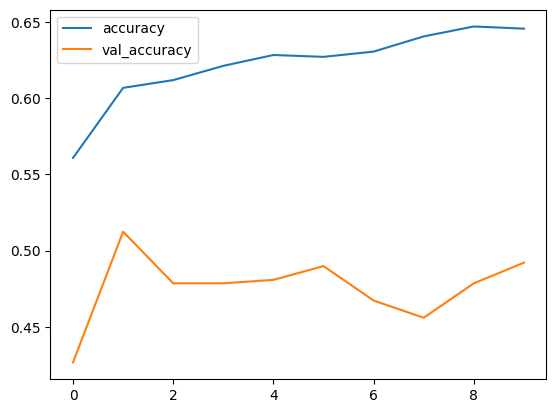

In [ ]:
metrics = history.history
plt.plot(history.epoch, metrics['accuracy'], metrics['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

# L2

In [ ]:
import keras.backend as K
K.clear_session()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2
K.clear_session()
my_modelL2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024),
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=l2(0.002)),
    tf.keras.layers.Dense(13, activation='softmax')
], name='my_modeL1')

my_modelL2.summary()

Model: "my_modeL1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 13)                6669      
                                                                 
Total params: 531,469
Trainable params: 531,469
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_modelL2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer="adam",
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            restore_best_weights=True)

In [ ]:
history = my_modelL2.fit(train_ds,
                       epochs=10,
                       validation_data=val_ds,
                       callbacks=callback)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


154/154 [==============================] - 2s 4ms/step - loss: 1.6311 - accuracy: 0.5628 - val_loss: 1.5174 - val_accuracy: 0.4944
Epoch 2/10
154/154 [==============================] - 1s 3ms/step - loss: 1.1373 - accuracy: 0.6562 - val_loss: 1.4231 - val_accuracy: 0.4898
Epoch 3/10
154/154 [==============================] - 1s 4ms/step - loss: 1.0378 - accuracy: 0.6812 - val_loss: 1.3275 - val_accuracy: 0.5327
Epoch 4/10
154/154 [==============================] - 0s 3ms/step - loss: 0.9991 - accuracy: 0.6822 - val_loss: 1.3001 - val_accuracy: 0.5530
Epoch 5/10
154/154 [==============================] - 0s 3ms/step - loss: 0.9577 - accuracy: 0.6942 - val_loss: 1.3102 - val_accuracy: 0.5034
Epoch 6/10
154/154 [==============================] - 1s 3ms/step - loss: 0.9317 - accuracy: 0.7037 - val_loss: 1.3901 - val_accuracy: 0.4989
Epoch 7/10
154/154 [==============================] - 1s 3ms/step - loss: 0.9205 - accuracy: 0.7131 - val_loss: 1.2932 - val_accuracy: 0.4989
Epoch 8/10
154/15

In [ ]:
loss, accuracy = my_modelL2.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

35/35 [==============================] - 0s 3ms/step - loss: 0.6532 - accuracy: 0.8242
Loss:  0.6532411575317383
Accuracy:  0.8242258429527283


In [ ]:
test_labels = []
test_predictions = []

for embeddings, label in test_ds:
    predictions = my_modelL2.predict(embeddings)
    predictions = np.argmax(predictions, axis=1)
    test_labels.extend(label.numpy())
    test_predictions.extend(predictions)
test_labels = np.array(test_labels)
test_predictions = np.array(test_predictions)
f1 = f1_score(test_labels, test_predictions, average='weighted')
precision = precision_score(test_labels, test_predictions, average='weighted')

print("F1 Score: ", f1)
print("Precision: ", precision)

1/1 [==============================] - 0s 114ms/step
F1 Score:  0.8091290064343015
Precision:  0.8026778465674278


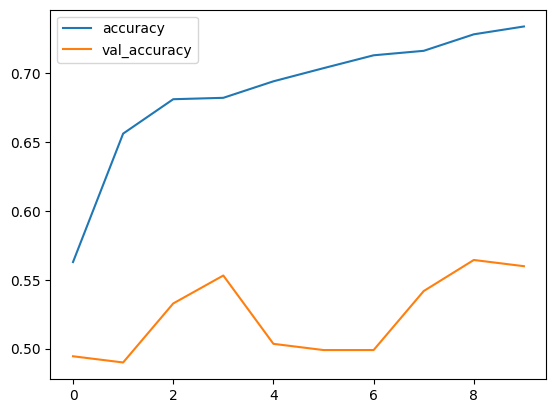

In [ ]:
metrics = history.history
plt.plot(history.epoch, metrics['accuracy'], metrics['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [ ]:
K.clear_session()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2,l1_l2
K.clear_session()
my_modelL = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024),
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    tf.keras.layers.Dense(13)
], name='my_modeL')

my_modelL.summary()

Model: "my_modeL"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 13)                6669      
                                                                 
Total params: 531,469
Trainable params: 531,469
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_modelL.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer="adam",
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            restore_best_weights=True)

In [ ]:
history = my_modelL.fit(train_ds,
                       epochs=10,
                       validation_data=val_ds,
                       callbacks=callback)

Epoch 1/10
154/154 [==============================] - 1s 4ms/step - loss: 27.9677 - accuracy: 0.4498 - val_loss: 3.1415 - val_accuracy: 0.2009
Epoch 2/10
154/154 [==============================] - 1s 3ms/step - loss: 2.5926 - accuracy: 0.4791 - val_loss: 2.9718 - val_accuracy: 0.2054
Epoch 3/10
154/154 [==============================] - 0s 3ms/step - loss: 2.4744 - accuracy: 0.5081 - val_loss: 2.8022 - val_accuracy: 0.2980
Epoch 4/10
154/154 [==============================] - 1s 3ms/step - loss: 2.3914 - accuracy: 0.5226 - val_loss: 2.7906 - val_accuracy: 0.3386
Epoch 5/10
154/154 [==============================] - 1s 3ms/step - loss: 2.3039 - accuracy: 0.5417 - val_loss: 2.6920 - val_accuracy: 0.3341
Epoch 6/10
154/154 [==============================] - 0s 3ms/step - loss: 2.2579 - accuracy: 0.5543 - val_loss: 2.6284 - val_accuracy: 0.3837
Epoch 7/10
154/154 [==============================] - 1s 3ms/step - loss: 2.2220 - accuracy: 0.5683 - val_loss: 2.5880 - val_accuracy: 0.3499
Epoch

In [ ]:
loss, accuracy = my_modelL.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

35/35 [==============================] - 0s 6ms/step - loss: 1.7850 - accuracy: 0.7286
Loss:  1.7850228548049927
Accuracy:  0.7285974621772766


In [ ]:
test_labels = []
test_predictions = []

for embeddings, label in test_ds:
    predictions = my_modelL.predict(embeddings)
    predictions = np.argmax(predictions, axis=1)
    test_labels.extend(label.numpy())
    test_predictions.extend(predictions)
test_labels = np.array(test_labels)
test_predictions = np.array(test_predictions)
f1 = f1_score(test_labels, test_predictions, average='weighted')
precision = precision_score(test_labels, test_predictions, average='weighted')

print("F1 Score: ", f1)
print("Precision: ", precision)

1/1 [==============================] - 0s 95ms/step
F1 Score:  0.6961641736644008
Precision:  0.7134752823834728


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# FOLD 10

In [ ]:
filter_pd['Fold'] = filter_pd['Fold'].replace(5,10)

In [ ]:

filter_pd.tail()

,sound,Fold,Cateogry,Target,filename
1169,12 (105).wav,10,Ruger Blackhawk,12,/content/gdrive/MyDrive/gunsound/12 (105).wav
1170,12 (106).wav,10,Ruger Blackhawk,12,/content/gdrive/MyDrive/gunsound/12 (106).wav
1171,12 (107).wav,10,Ruger Blackhawk,12,/content/gdrive/MyDrive/gunsound/12 (107).wav
1172,12 (108).wav,10,Ruger Blackhawk,12,/content/gdrive/MyDrive/gunsound/12 (108).wav
1173,12 (109).wav,10,Ruger Blackhawk,12,/content/gdrive/MyDrive/gunsound/12 (109).wav


In [ ]:
shuffled_df = filter_pd.sample(frac=1, axis=0, random_state=100)

print(shuffled_df)

            sound  Fold          Cateogry  Target  \
1153  12 (89).wav    10   Ruger Blackhawk      12   
537    6 (68).wav    10              M249       6   
634    7 (66).wav    10             MG-42       7   
384    5 (15).wav    10               M16       5   
118    2 (47).wav    10  IMI Desert Eagle       2   
...           ...   ...               ...     ...   
802    9 (34).wav    10       Zastava M92       9   
53     1 (54).wav    10             AK-47       1   
350    4 (81).wav    10                M4       4   
79      2 (8).wav    10  IMI Desert Eagle       2   
792    9 (24).wav    10       Zastava M92       9   

                                          filename  
1153  /content/gdrive/MyDrive/gunsound/12 (89).wav  
537    /content/gdrive/MyDrive/gunsound/6 (68).wav  
634    /content/gdrive/MyDrive/gunsound/7 (66).wav  
384    /content/gdrive/MyDrive/gunsound/5 (15).wav  
118    /content/gdrive/MyDrive/gunsound/2 (47).wav  
...                                          

In [ ]:
train=shuffled_df[:940]                   #ratio 80-10-10
val = shuffled_df[940: 940 + 117]
test = shuffled_df[-117:]

In [ ]:
filenames = train['filename']
targets = train['Target']
folds = train['Fold']
'''filenames_tensor = tf.constant(filenames)
targets_tensor = tf.constant(targets)
folds_tensor = tf.constant(folds)'''
train_ds = tf.data.Dataset.from_tensor_slices((filenames, targets,folds))
filenames = val['filename']
targets = val['Target']
folds = val['Fold']
val_ds = tf.data.Dataset.from_tensor_slices((filenames, targets,folds))
filenames = test['filename']
targets = test['Target']
folds = test['Fold']
test_ds = tf.data.Dataset.from_tensor_slices((filenames, targets,folds))
train_ds.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [ ]:
def load_wav_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(
          file_contents,
          desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [ ]:
def load_wav_for_map(filename, label,folds):
  return load_wav_16k_mono(filename), label,folds

train_ds = train_ds.map(load_wav_for_map)
val_ds = val_ds.map(load_wav_for_map)
test_ds = test_ds.map(load_wav_for_map)
val_ds.element_spec

(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [ ]:
def extract_embedding(wav_data, label,folds):
  ''' run YAMNet to extract embedding from the wav data '''
  scores, embeddings, spectrogram = yamnet_model(wav_data)
  num_embeddings = tf.shape(embeddings)[0]
  return (embeddings,
            tf.repeat(label, num_embeddings),tf.repeat(folds, num_embeddings))

In [ ]:
train_ds = train_ds.map(extract_embedding).unbatch()
test_ds = test_ds.map(extract_embedding).unbatch()
val_ds = val_ds.map(extract_embedding).unbatch()

In [ ]:
remove_fold_column = lambda embedding, label, fold: (embedding, label)

train_ds = train_ds.map(remove_fold_column)
val_ds = val_ds.map(remove_fold_column)
test_ds = test_ds.map(remove_fold_column)

train_ds = train_ds.cache().shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
import keras.backend as K
K.clear_session()
my_modelb = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024),
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(13)
], name='my_model')

my_modelb.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 13)                6669      
                                                                 
Total params: 531,469
Trainable params: 531,469
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_modelb.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,restore_best_weights=True)

In [ ]:
history = my_modelb.fit(train_ds,
                       epochs=10,
                       validation_data=val_ds,
                       callbacks=callback)

Epoch 1/10
154/154 [==============================] - 67s 380ms/step - loss: 1.2148 - accuracy: 0.5706 - val_loss: 1.3987 - val_accuracy: 0.4740
Epoch 2/10
154/154 [==============================] - 1s 5ms/step - loss: 0.9414 - accuracy: 0.6580 - val_loss: 1.2127 - val_accuracy: 0.5440
Epoch 3/10
154/154 [==============================] - 1s 4ms/step - loss: 0.8422 - accuracy: 0.6834 - val_loss: 1.2534 - val_accuracy: 0.5011
Epoch 4/10
154/154 [==============================] - 1s 3ms/step - loss: 0.7700 - accuracy: 0.7149 - val_loss: 1.2583 - val_accuracy: 0.4921
Epoch 5/10
154/154 [==============================] - 1s 3ms/step - loss: 0.7113 - accuracy: 0.7334 - val_loss: 1.1012 - val_accuracy: 0.5305
Epoch 6/10
154/154 [==============================] - 1s 3ms/step - loss: 0.6657 - accuracy: 0.7458 - val_loss: 1.1257 - val_accuracy: 0.5643
Epoch 7/10
154/154 [==============================] - 1s 3ms/step - loss: 0.6259 - accuracy: 0.7578 - val_loss: 1.1345 - val_accuracy: 0.5102
Epo

In [ ]:
loss, accuracy = my_modelb.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

35/35 [==============================] - 13s 343ms/step - loss: 0.5055 - accuracy: 0.8142
Loss:  0.505530834197998
Accuracy:  0.8142076730728149


In [ ]:
test_labels = []
test_predictions = []

for embeddings, label in test_ds:
    predictions = my_modelb.predict(embeddings)
    predictions = np.argmax(predictions, axis=1)
    test_labels.extend(label.numpy())
    test_predictions.extend(predictions)
test_labels = np.array(test_labels)
test_predictions = np.array(test_predictions)
f1 = f1_score(test_labels, test_predictions, average='weighted')
precision = precision_score(test_labels, test_predictions, average='weighted')

print("F1 Score: ", f1)
print("Precision: ", precision)

1/1 [==============================] - 0s 49ms/step
F1 Score:  0.807634942586612
Precision:  0.8180550181991407


# 3 FOLD

In [ ]:
filter_pd['Fold'] = filter_pd['Fold'].replace(10,3)

In [ ]:
filter_pd.tail()

,sound,Fold,Cateogry,Target,filename
1169,12 (105).wav,3,Ruger Blackhawk,12,/content/gdrive/MyDrive/gunsound/12 (105).wav
1170,12 (106).wav,3,Ruger Blackhawk,12,/content/gdrive/MyDrive/gunsound/12 (106).wav
1171,12 (107).wav,3,Ruger Blackhawk,12,/content/gdrive/MyDrive/gunsound/12 (107).wav
1172,12 (108).wav,3,Ruger Blackhawk,12,/content/gdrive/MyDrive/gunsound/12 (108).wav
1173,12 (109).wav,3,Ruger Blackhawk,12,/content/gdrive/MyDrive/gunsound/12 (109).wav


In [ ]:
shuffled_df = filter_pd.sample(frac=1, axis=0, random_state=100)

print(shuffled_df)

            sound  Fold          Cateogry  Target  \
1153  12 (89).wav     3   Ruger Blackhawk      12   
537    6 (68).wav     3              M249       6   
634    7 (66).wav     3             MG-42       7   
384    5 (15).wav     3               M16       5   
118    2 (47).wav     3  IMI Desert Eagle       2   
...           ...   ...               ...     ...   
802    9 (34).wav     3       Zastava M92       9   
53     1 (54).wav     3             AK-47       1   
350    4 (81).wav     3                M4       4   
79      2 (8).wav     3  IMI Desert Eagle       2   
792    9 (24).wav     3       Zastava M92       9   

                                          filename  
1153  /content/gdrive/MyDrive/gunsound/12 (89).wav  
537    /content/gdrive/MyDrive/gunsound/6 (68).wav  
634    /content/gdrive/MyDrive/gunsound/7 (66).wav  
384    /content/gdrive/MyDrive/gunsound/5 (15).wav  
118    /content/gdrive/MyDrive/gunsound/2 (47).wav  
...                                          

In [ ]:
train=shuffled_df[:940]                   #ratio 80-10-10
val = shuffled_df[940: 940 + 117]
test = shuffled_df[-117:]

In [ ]:
filenames = train['filename']
targets = train['Target']
folds = train['Fold']
'''filenames_tensor = tf.constant(filenames)
targets_tensor = tf.constant(targets)
folds_tensor = tf.constant(folds)'''
train_ds = tf.data.Dataset.from_tensor_slices((filenames, targets,folds))
filenames = val['filename']
targets = val['Target']
folds = val['Fold']
val_ds = tf.data.Dataset.from_tensor_slices((filenames, targets,folds))
filenames = test['filename']
targets = test['Target']
folds = test['Fold']
test_ds = tf.data.Dataset.from_tensor_slices((filenames, targets,folds))
train_ds.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [ ]:
def load_wav_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(
          file_contents,
          desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [ ]:
def load_wav_for_map(filename, label,folds):
  return load_wav_16k_mono(filename), label,folds

train_ds = train_ds.map(load_wav_for_map)
val_ds = val_ds.map(load_wav_for_map)
test_ds = test_ds.map(load_wav_for_map)
val_ds.element_spec

(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [ ]:
def extract_embedding(wav_data, label,folds):
  ''' run YAMNet to extract embedding from the wav data '''
  scores, embeddings, spectrogram = yamnet_model(wav_data)
  num_embeddings = tf.shape(embeddings)[0]
  return (embeddings,
            tf.repeat(label, num_embeddings),tf.repeat(folds, num_embeddings))

In [ ]:
train_ds = train_ds.map(extract_embedding).unbatch()
test_ds = test_ds.map(extract_embedding).unbatch()
val_ds = val_ds.map(extract_embedding).unbatch()

In [ ]:
remove_fold_column = lambda embedding, label, fold: (embedding, label)

train_ds = train_ds.map(remove_fold_column)
val_ds = val_ds.map(remove_fold_column)
test_ds = test_ds.map(remove_fold_column)

train_ds = train_ds.cache().shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
import keras.backend as K
K.clear_session()
my_modelb = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024),
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(13)
], name='my_model')

my_modelb.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 13)                6669      
                                                                 
Total params: 531,469
Trainable params: 531,469
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_modelb.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,restore_best_weights=True)

In [ ]:
history = my_modelb.fit(train_ds,
                       epochs=10,
                       validation_data=val_ds,
                       callbacks=callback)

Epoch 1/10
154/154 [==============================] - 64s 365ms/step - loss: 1.2214 - accuracy: 0.5730 - val_loss: 1.4040 - val_accuracy: 0.4650
Epoch 2/10
154/154 [==============================] - 1s 3ms/step - loss: 0.9373 - accuracy: 0.6625 - val_loss: 1.3487 - val_accuracy: 0.4515
Epoch 3/10
154/154 [==============================] - 1s 4ms/step - loss: 0.8298 - accuracy: 0.6881 - val_loss: 1.3051 - val_accuracy: 0.4650
Epoch 4/10
154/154 [==============================] - 1s 5ms/step - loss: 0.7571 - accuracy: 0.7161 - val_loss: 1.1174 - val_accuracy: 0.5621
Epoch 5/10
154/154 [==============================] - 1s 5ms/step - loss: 0.7092 - accuracy: 0.7298 - val_loss: 1.1915 - val_accuracy: 0.5350
Epoch 6/10
154/154 [==============================] - 1s 5ms/step - loss: 0.6654 - accuracy: 0.7466 - val_loss: 1.1061 - val_accuracy: 0.5598
Epoch 7/10
154/154 [==============================] - 1s 5ms/step - loss: 0.6107 - accuracy: 0.7649 - val_loss: 1.1998 - val_accuracy: 0.5350
Epo

In [ ]:
loss, accuracy = my_modelb.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

35/35 [==============================] - 17s 474ms/step - loss: 0.5085 - accuracy: 0.8169
Loss:  0.5085147619247437
Accuracy:  0.8169398903846741


## 1 FOLD

In [ ]:
filter_pd['Fold'] = filter_pd['Fold'].replace(3,1)
filter_pd.tail()

,sound,Fold,Cateogry,Target,filename
1169,12 (105).wav,1,Ruger Blackhawk,12,/content/gdrive/MyDrive/gunsound/12 (105).wav
1170,12 (106).wav,1,Ruger Blackhawk,12,/content/gdrive/MyDrive/gunsound/12 (106).wav
1171,12 (107).wav,1,Ruger Blackhawk,12,/content/gdrive/MyDrive/gunsound/12 (107).wav
1172,12 (108).wav,1,Ruger Blackhawk,12,/content/gdrive/MyDrive/gunsound/12 (108).wav
1173,12 (109).wav,1,Ruger Blackhawk,12,/content/gdrive/MyDrive/gunsound/12 (109).wav


In [ ]:
shuffled_df = filter_pd.sample(frac=1, axis=0, random_state=100)

print(shuffled_df)

            sound  Fold          Cateogry  Target  \
1153  12 (89).wav     1   Ruger Blackhawk      12   
537    6 (68).wav     1              M249       6   
634    7 (66).wav     1             MG-42       7   
384    5 (15).wav     1               M16       5   
118    2 (47).wav     1  IMI Desert Eagle       2   
...           ...   ...               ...     ...   
802    9 (34).wav     1       Zastava M92       9   
53     1 (54).wav     1             AK-47       1   
350    4 (81).wav     1                M4       4   
79      2 (8).wav     1  IMI Desert Eagle       2   
792    9 (24).wav     1       Zastava M92       9   

                                          filename  
1153  /content/gdrive/MyDrive/gunsound/12 (89).wav  
537    /content/gdrive/MyDrive/gunsound/6 (68).wav  
634    /content/gdrive/MyDrive/gunsound/7 (66).wav  
384    /content/gdrive/MyDrive/gunsound/5 (15).wav  
118    /content/gdrive/MyDrive/gunsound/2 (47).wav  
...                                          

In [ ]:
train=shuffled_df[:940]                   #ratio 80-10-10
val = shuffled_df[940: 940 + 117]
test = shuffled_df[-117:]

In [ ]:
filenames = train['filename']
targets = train['Target']
folds = train['Fold']
'''filenames_tensor = tf.constant(filenames)
targets_tensor = tf.constant(targets)
folds_tensor = tf.constant(folds)'''
train_ds = tf.data.Dataset.from_tensor_slices((filenames, targets,folds))
filenames = val['filename']
targets = val['Target']
folds = val['Fold']
val_ds = tf.data.Dataset.from_tensor_slices((filenames, targets,folds))
filenames = test['filename']
targets = test['Target']
folds = test['Fold']
test_ds = tf.data.Dataset.from_tensor_slices((filenames, targets,folds))
train_ds.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [ ]:
def load_wav_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(
          file_contents,
          desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [ ]:
def load_wav_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(
          file_contents,
          desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [ ]:
def load_wav_for_map(filename, label,folds):
  return load_wav_16k_mono(filename), label,folds

train_ds = train_ds.map(load_wav_for_map)
val_ds = val_ds.map(load_wav_for_map)
test_ds = test_ds.map(load_wav_for_map)
val_ds.element_spec

AttributeError: in user code:

    File "/var/folders/t9/t43x1h1d24z9__zp5cb6qpx80000gn/T/ipykernel_1492/1624312273.py", line 2, in load_wav_for_map  *
        return load_wav_16k_mono(filename), label,folds
    File "/var/folders/t9/t43x1h1d24z9__zp5cb6qpx80000gn/T/ipykernel_1492/212221097.py", line 9, in load_wav_16k_mono  *
        wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    File "/Users/jaycrappe/Documents/GitHub/Gun-classification-using-gunshot/env/lib/python3.11/site-packages/tensorflow_io/python/ops/audio_ops.py", line 466, in f  *
        i, rate_in=rate_in, rate_out=rate_out, name=name
    File "/Users/jaycrappe/Documents/GitHub/Gun-classification-using-gunshot/env/lib/python3.11/site-packages/tensorflow_io/python/ops/__init__.py", line 88, in __getattr__
        return getattr(self._load(), attrb)

    AttributeError: module '56c055b4afaba95af0256db7c72edd0d967e1981' has no attribute 'io_audio_resample'


In [ ]:
def extract_embedding(wav_data, label,folds):
  ''' run YAMNet to extract embedding from the wav data '''
  scores, embeddings, spectrogram = yamnet_model(wav_data)
  num_embeddings = tf.shape(embeddings)[0]
  return (embeddings,
            tf.repeat(label, num_embeddings),tf.repeat(folds, num_embeddings))

In [ ]:
train_ds = train_ds.map(extract_embedding).unbatch()
test_ds = test_ds.map(extract_embedding).unbatch()
val_ds = val_ds.map(extract_embedding).unbatch()

In [ ]:
remove_fold_column = lambda embedding, label, fold: (embedding, label)

train_ds = train_ds.map(remove_fold_column)
val_ds = val_ds.map(remove_fold_column)
test_ds = test_ds.map(remove_fold_column)

train_ds = train_ds.cache().shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
import keras.backend as K
K.clear_session()
my_modelb = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024),
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(13)
], name='my_model')

my_modelb.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 13)                6669      
                                                                 
Total params: 531,469
Trainable params: 531,469
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_modelb.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,restore_best_weights=True)

In [ ]:
history = my_modelb.fit(train_ds,
                       epochs=10,
                       validation_data=val_ds,
                       callbacks=callback)

Epoch 1/10
154/154 [==============================] - 53s 265ms/step - loss: 1.2225 - accuracy: 0.5706 - val_loss: 1.4014 - val_accuracy: 0.4695
Epoch 2/10
154/154 [==============================] - 1s 5ms/step - loss: 0.9547 - accuracy: 0.6503 - val_loss: 1.1766 - val_accuracy: 0.5260
Epoch 3/10
154/154 [==============================] - 0s 3ms/step - loss: 0.8385 - accuracy: 0.6867 - val_loss: 1.1906 - val_accuracy: 0.5463
Epoch 4/10
154/154 [==============================] - 1s 5ms/step - loss: 0.7578 - accuracy: 0.7090 - val_loss: 1.1389 - val_accuracy: 0.5350
Epoch 5/10
154/154 [==============================] - 1s 6ms/step - loss: 0.7188 - accuracy: 0.7292 - val_loss: 1.1271 - val_accuracy: 0.5734
Epoch 6/10
154/154 [==============================] - 0s 3ms/step - loss: 0.6654 - accuracy: 0.7434 - val_loss: 1.1422 - val_accuracy: 0.5440
Epoch 7/10
154/154 [==============================] - 0s 3ms/step - loss: 0.6207 - accuracy: 0.7649 - val_loss: 1.0220 - val_accuracy: 0.6050
Epo

In [ ]:
loss, accuracy = my_modelb.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

35/35 [==============================] - 13s 354ms/step - loss: 0.4884 - accuracy: 0.8160
Loss:  0.4884445071220398
Accuracy:  0.8160291314125061


# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
train = shuffled_df[:940]
val = shuffled_df[940: 940 + 117]
test = shuffled_df[-117:]

In [ ]:
def load_wav_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav


In [ ]:
def load_wav_for_map(filename, label, folds):
    return load_wav_16k_mono(filename), label, folds

train_ds = tf.data.Dataset.from_tensor_slices((train['filename'], train['Target'], train['Fold']))
train_ds = train_ds.map(load_wav_for_map)

val_ds = tf.data.Dataset.from_tensor_slices((val['filename'], val['Target'], val['Fold']))
val_ds = val_ds.map(load_wav_for_map)

test_ds = tf.data.Dataset.from_tensor_slices((test['filename'], test['Target'], test['Fold']))
test_ds = test_ds.map(load_wav_for_map)

In [ ]:
def extract_embedding(wav_data, label, folds):
    scores, embeddings, spectrogram = yamnet_model(wav_data)
    num_embeddings = tf.shape(embeddings)[0]
    return (embeddings, tf.repeat(label, num_embeddings), tf.repeat(folds, num_embeddings))

train_ds = train_ds.map(extract_embedding).unbatch()
test_ds = test_ds.map(extract_embedding).unbatch()
val_ds = val_ds.map(extract_embedding).unbatch()

In [ ]:
train_embeddings, train_labels, train_folds = [], [], []
for embeddings, label, folds in train_ds:
    train_embeddings.append(embeddings.numpy())
    train_labels.append(label.numpy())
    train_folds.append(folds.numpy())

In [ ]:
train_embeddings = np.array(train_embeddings)
train_labels = np.array(train_labels)
train_folds = np.array(train_folds)


In [ ]:
val_embeddings, val_labels, val_folds = [], [], []
for embeddings, label, folds in val_ds:
    val_embeddings.append(embeddings.numpy())
    val_labels.append(label.numpy())
    val_folds.append(folds.numpy())

In [ ]:

val_embeddings = np.array(val_embeddings)
val_labels = np.array(val_labels)
val_folds = np.array(val_folds)

In [ ]:
test_embeddings, test_labels, test_folds = [], [], []
for embeddings, label, folds in test_ds:
    test_embeddings.append(embeddings.numpy())
    test_labels.append(label.numpy())
    test_folds.append(folds.numpy())

test_embeddings = np.array(test_embeddings)
test_labels = np.array(test_labels)
test_folds = np.array(test_folds)

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

In [ ]:
for train_index, val_index in kf.split(train_embeddings):
    X_train, X_val = train_embeddings[train_index], train_embeddings[val_index]
    y_train, y_val = train_labels[train_index], train_labels[val_index]

    # SVM model training
    svm_model = SVC(kernel='linear', C=1.0)
    svm_model.fit(X_train, y_train)

    # SVM model evaluation on validation set
    accuracy = svm_model.score(X_val, y_val)
    accuracies.append(accuracy)

In [ ]:
average_accuracy = np.mean(accuracies)
print("Average SVM Accuracy with 5-Fold Cross-Validation:", average_accuracy)

Average SVM Accuracy with 5-Fold Cross-Validation: 0.6657188464051476


In [ ]:
svm_model = SVC(kernel='linear', C=1.0)  # You can experiment with different kernels and C values
svm_model.fit(train_embeddings, train_labels)

SVC(kernel='linear')

In [ ]:
test_accuracy = svm_model.score(test_embeddings, test_labels)
print("Final SVM Accuracy on Test Set:", test_accuracy)

Final SVM Accuracy on Test Set: 0.8160291438979964


# KNN 3


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
train = shuffled_df[:940]
val = shuffled_df[940: 940 + 117]
test = shuffled_df[-117:]

In [ ]:
def load_wav_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav
def load_wav_for_map(filename, label, folds):
    return load_wav_16k_mono(filename), label, folds

train_ds = tf.data.Dataset.from_tensor_slices((train['filename'], train['Target'], train['Fold']))
train_ds = train_ds.map(load_wav_for_map)

val_ds = tf.data.Dataset.from_tensor_slices((val['filename'], val['Target'], val['Fold']))
val_ds = val_ds.map(load_wav_for_map)

test_ds = tf.data.Dataset.from_tensor_slices((test['filename'], test['Target'], test['Fold']))
test_ds = test_ds.map(load_wav_for_map)

In [ ]:
def extract_embedding(wav_data, label, folds):
    scores, embeddings, spectrogram = yamnet_model(wav_data)
    num_embeddings = tf.shape(embeddings)[0]
    return (embeddings, tf.repeat(label, num_embeddings), tf.repeat(folds, num_embeddings))

train_ds = train_ds.map(extract_embedding).unbatch()
test_ds = test_ds.map(extract_embedding).unbatch()
val_ds = val_ds.map(extract_embedding).unbatch()

In [ ]:
train_embeddings, train_labels, train_folds = [], [], []
for embeddings, label, folds in train_ds:
    train_embeddings.append(embeddings.numpy())
    train_labels.append(label.numpy())
    train_folds.append(folds.numpy())
train_embeddings = np.array(train_embeddings)
train_labels = np.array(train_labels)
train_folds = np.array(train_folds)


In [ ]:
val_embeddings, val_labels, val_folds = [], [], []
for embeddings, label, folds in val_ds:
    val_embeddings.append(embeddings.numpy())
    val_labels.append(label.numpy())
    val_folds.append(folds.numpy())
val_embeddings = np.array(val_embeddings)
val_labels = np.array(val_labels)
val_folds = np.array(val_folds)

In [ ]:
test_embeddings, test_labels, test_folds = [], [], []
for embeddings, label, folds in test_ds:
    test_embeddings.append(embeddings.numpy())
    test_labels.append(label.numpy())
    test_folds.append(folds.numpy())

test_embeddings = np.array(test_embeddings)
test_labels = np.array(test_labels)
test_folds = np.array(test_folds)


In [ ]:
from sklearn.model_selection import KFold
knn_model = KNeighborsClassifier(n_neighbors=3)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
for train_index, val_index in kf.split(train_embeddings):
    X_train, X_val = train_embeddings[train_index], train_embeddings[val_index]
    y_train, y_val = train_labels[train_index], train_labels[val_index]
    knn_model.fit(X_train, y_train)
    accuracy = knn_model.score(X_val, y_val)
    accuracies.append(accuracy)
average_accuracy = np.mean(accuracies)
print("Average KNN Accuracy with 5-Fold Cross-Validation:", average_accuracy)

Average KNN Accuracy with 5-Fold Cross-Validation: 0.6305403237145291


In [ ]:
knn_model.fit(train_embeddings, train_labels)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
test_accuracy = knn_model.score(test_embeddings, test_labels)
print("Final KNN Accuracy on Test Set:", test_accuracy)


Final KNN Accuracy on Test Set: 0.7814207650273224


# KNN 5

In [ ]:
from sklearn.model_selection import KFold
knn_model = KNeighborsClassifier(n_neighbors=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
for train_index, val_index in kf.split(train_embeddings):
    X_train, X_val = train_embeddings[train_index], train_embeddings[val_index]
    y_train, y_val = train_labels[train_index], train_labels[val_index]
    knn_model.fit(X_train, y_train)
    accuracy = knn_model.score(X_val, y_val)
    accuracies.append(accuracy)
average_accuracy = np.mean(accuracies)
print("Average KNN Accuracy with 5-Fold Cross-Validation:", average_accuracy)

Average KNN Accuracy with 5-Fold Cross-Validation: 0.6293210182864799


In [ ]:
knn_model.fit(train_embeddings, train_labels)

KNeighborsClassifier()

In [ ]:
test_accuracy = knn_model.score(test_embeddings, test_labels)
print("Final KNN Accuracy on Test Set:", test_accuracy)

Final KNN Accuracy on Test Set: 0.7832422586520947


# KNN 1

In [ ]:
from sklearn.model_selection import KFold
knn_model = KNeighborsClassifier(n_neighbors=1)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
for train_index, val_index in kf.split(train_embeddings):
    X_train, X_val = train_embeddings[train_index], train_embeddings[val_index]
    y_train, y_val = train_labels[train_index], train_labels[val_index]
    knn_model.fit(X_train, y_train)
    accuracy = knn_model.score(X_val, y_val)
    accuracies.append(accuracy)
average_accuracy = np.mean(accuracies)
print("Average KNN Accuracy with 5-Fold Cross-Validation:", average_accuracy)

Average KNN Accuracy with 5-Fold Cross-Validation: 0.6407087148185826


In [ ]:
knn_model.fit(train_embeddings, train_labels)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
test_accuracy = knn_model.score(test_embeddings, test_labels)
print("Final KNN Accuracy on Test Set:", test_accuracy)

Final KNN Accuracy on Test Set: 0.7805100182149363


# Epoch -50

In [ ]:
import keras.backend as K
K.clear_session()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2
K.clear_session()
my_modele1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024),
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=l2(0.002)),
    tf.keras.layers.Dense(13, activation='softmax')
], name='my_modee1')

my_modele1.summary()

Model: "my_modee1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 13)                6669      
                                                                 
Total params: 531,469
Trainable params: 531,469
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_modele1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer="Adam",
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=5,
                                            restore_best_weights=True)

In [ ]:
history = my_modele1.fit(train_ds,
                       epochs=50,
                       validation_data=val_ds,
                       callbacks=callback)

Epoch 1/50
154/154 [==============================] - 2s 6ms/step - loss: 1.6099 - accuracy: 0.5683 - val_loss: 1.6246 - val_accuracy: 0.4447
Epoch 2/50
154/154 [==============================] - 1s 5ms/step - loss: 1.1610 - accuracy: 0.6407 - val_loss: 1.3880 - val_accuracy: 0.5102
Epoch 3/50
154/154 [==============================] - 1s 5ms/step - loss: 1.0756 - accuracy: 0.6720 - val_loss: 1.3860 - val_accuracy: 0.4898
Epoch 4/50
154/154 [==============================] - 1s 5ms/step - loss: 1.0199 - accuracy: 0.6924 - val_loss: 1.2710 - val_accuracy: 0.5711
Epoch 5/50
154/154 [==============================] - 1s 5ms/step - loss: 0.9636 - accuracy: 0.6970 - val_loss: 1.2600 - val_accuracy: 0.5553
Epoch 6/50
154/154 [==============================] - 1s 5ms/step - loss: 0.9435 - accuracy: 0.7088 - val_loss: 1.2602 - val_accuracy: 0.5440
Epoch 7/50
154/154 [==============================] - 1s 5ms/step - loss: 0.9103 - accuracy: 0.7147 - val_loss: 1.2886 - val_accuracy: 0.5282
Epoch 

In [ ]:
loss, accuracy = my_modele1.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

35/35 [==============================] - 0s 4ms/step - loss: 0.6659 - accuracy: 0.8233
Loss:  0.6658810973167419
Accuracy:  0.8233151435852051


# Epoch-100

In [ ]:
import keras.backend as K
K.clear_session()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2
K.clear_session()
my_modele2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024),
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.Dense(13, activation='softmax')
], name='my_modele2')

my_modele2.summary()

Model: "my_modele2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 13)                6669      
                                                                 
Total params: 531,469
Trainable params: 531,469
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_modele2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer="Adam",
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=10,
                                            restore_best_weights=True)

In [ ]:
history = my_modele2.fit(train_ds,
                       epochs=100,
                       validation_data=val_ds,
                       callbacks=callback)

Epoch 1/100
154/154 [==============================] - 1s 4ms/step - loss: 1.4757 - accuracy: 0.5618 - val_loss: 1.4311 - val_accuracy: 0.4720
Epoch 2/100
154/154 [==============================] - 1s 3ms/step - loss: 1.0779 - accuracy: 0.6517 - val_loss: 1.3997 - val_accuracy: 0.5123
Epoch 3/100
154/154 [==============================] - 1s 3ms/step - loss: 0.9872 - accuracy: 0.6761 - val_loss: 1.2984 - val_accuracy: 0.5235
Epoch 4/100
154/154 [==============================] - 1s 3ms/step - loss: 0.9234 - accuracy: 0.6985 - val_loss: 1.2317 - val_accuracy: 0.5817
Epoch 5/100
154/154 [==============================] - 1s 3ms/step - loss: 0.9011 - accuracy: 0.7109 - val_loss: 1.2619 - val_accuracy: 0.5548
Epoch 6/100
154/154 [==============================] - 1s 3ms/step - loss: 0.8588 - accuracy: 0.7249 - val_loss: 1.3250 - val_accuracy: 0.5414
Epoch 7/100
154/154 [==============================] - 1s 3ms/step - loss: 0.8278 - accuracy: 0.7302 - val_loss: 1.2315 - val_accuracy: 0.5749

In [ ]:
loss, accuracy = my_modele2.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

35/35 [==============================] - 0s 3ms/step - loss: 0.6282 - accuracy: 0.8215
Loss:  0.6282492876052856
Accuracy:  0.8214936256408691


# epoch-200

In [ ]:
import keras.backend as K
K.clear_session()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2
K.clear_session()
my_modele3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024),
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.Dense(13, activation='softmax')
], name='my_modele3')

my_modele3.summary()

Model: "my_modele3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 13)                6669      
                                                                 
Total params: 531,469
Trainable params: 531,469
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_modele3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer="Adam",
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=20,
                                            restore_best_weights=True)

In [ ]:
history = my_modele3.fit(train_ds,
                       epochs=200,
                       validation_data=val_ds,
                       callbacks=callback)

Epoch 1/200
154/154 [==============================] - 73s 409ms/step - loss: 1.4519 - accuracy: 0.5624 - val_loss: 1.4499 - val_accuracy: 0.4944
Epoch 2/200
154/154 [==============================] - 1s 3ms/step - loss: 1.0718 - accuracy: 0.6574 - val_loss: 1.3693 - val_accuracy: 0.5079
Epoch 3/200
154/154 [==============================] - 1s 3ms/step - loss: 0.9789 - accuracy: 0.6771 - val_loss: 1.2983 - val_accuracy: 0.5395
Epoch 4/200
154/154 [==============================] - 1s 4ms/step - loss: 0.9793 - accuracy: 0.6974 - val_loss: 1.3219 - val_accuracy: 0.5282
Epoch 5/200
154/154 [==============================] - 1s 4ms/step - loss: 0.8917 - accuracy: 0.7102 - val_loss: 1.2650 - val_accuracy: 0.5530
Epoch 6/200
154/154 [==============================] - 1s 3ms/step - loss: 0.8600 - accuracy: 0.7273 - val_loss: 1.2136 - val_accuracy: 0.5440
Epoch 7/200
154/154 [==============================] - 1s 3ms/step - loss: 0.8432 - accuracy: 0.7314 - val_loss: 1.2952 - val_accuracy: 0.5

In [ ]:
loss, accuracy = my_modele3.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

35/35 [==============================] - 34s 913ms/step - loss: 0.6530 - accuracy: 0.8197
Loss:  0.6529515385627747
Accuracy:  0.8196721076965332


# **Taking all the best parameters**

In [ ]:
import keras.backend as K
K.clear_session()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2
K.clear_session()
my_modele = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024),
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(13, activation='softmax')
], name='my_modele')

my_modele.summary()

In [ ]:
my_modele.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer="Adamax",
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=10,
                                            restore_best_weights=True)

In [ ]:
history = my_modele.fit(train_ds,
                       epochs=100,
                       validation_data=val_ds,
                       callbacks=callback)

Epoch 1/100
154/154 [==============================] - 4s 8ms/step - loss: 3.2438 - accuracy: 0.5209 - val_loss: 2.3014 - val_accuracy: 0.4650
Epoch 2/100
154/154 [==============================] - 1s 7ms/step - loss: 1.7547 - accuracy: 0.6051 - val_loss: 1.9038 - val_accuracy: 0.4515
Epoch 3/100
154/154 [==============================] - 1s 7ms/step - loss: 1.4987 - accuracy: 0.6208 - val_loss: 1.7354 - val_accuracy: 0.5282
Epoch 4/100
154/154 [==============================] - 1s 7ms/step - loss: 1.3623 - accuracy: 0.6393 - val_loss: 1.6124 - val_accuracy: 0.5011
Epoch 5/100
154/154 [==============================] - 1s 5ms/step - loss: 1.2742 - accuracy: 0.6531 - val_loss: 1.5636 - val_accuracy: 0.5102
Epoch 6/100
154/154 [==============================] - 1s 5ms/step - loss: 1.2209 - accuracy: 0.6602 - val_loss: 1.5080 - val_accuracy: 0.5237
Epoch 7/100
154/154 [==============================] - 1s 5ms/step - loss: 1.1724 - accuracy: 0.6596 - val_loss: 1.4814 - val_accuracy: 0.5350

In [ ]:
loss, accuracy = my_modele.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

35/35 [==============================] - 0s 3ms/step - loss: 0.6113 - accuracy: 0.8224
Loss:  0.611284613609314
Accuracy:  0.8224043846130371


In [ ]:
test_labels = []
test_predictions = []

for embeddings, label in test_ds:
    predictions = my_modele.predict(embeddings)
    predictions = np.argmax(predictions, axis=1)
    test_labels.extend(label.numpy())
    test_predictions.extend(predictions)
test_labels = np.array(test_labels)
test_predictions = np.array(test_predictions)
f1 = f1_score(test_labels, test_predictions, average='weighted')
precision = precision_score(test_labels, test_predictions, average='weighted')

print("F1 Score: ", f1)
print("Precision: ", precision)

1/1 [==============================] - 0s 151ms/step
F1 Score:  0.8098631699017979
Precision:  0.8109137520880572


In [ ]:
import keras.backend as K
K.clear_session()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2
K.clear_session()
my_modele = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024),
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(13, activation='softmax')
], name='my_modele')

my_modele.summary()

Model: "my_modele"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 13)                6669      
                                                                 
Total params: 531,469
Trainable params: 531,469
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_modele.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer="Adamax",
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=10,
                                            restore_best_weights=True)

In [ ]:
history = my_modele.fit(train_ds,
                       epochs=100,
                       validation_data=val_ds,
                       callbacks=callback)

Epoch 1/100
154/154 [==============================] - 56s 314ms/step - loss: 1.7175 - accuracy: 0.5207 - val_loss: 1.7793 - val_accuracy: 0.4470
Epoch 2/100
154/154 [==============================] - 1s 3ms/step - loss: 1.3338 - accuracy: 0.6061 - val_loss: 1.5782 - val_accuracy: 0.4740
Epoch 3/100
154/154 [==============================] - 1s 3ms/step - loss: 1.2269 - accuracy: 0.6332 - val_loss: 1.5432 - val_accuracy: 0.4605
Epoch 4/100
154/154 [==============================] - 1s 3ms/step - loss: 1.1555 - accuracy: 0.6562 - val_loss: 1.4275 - val_accuracy: 0.5237
Epoch 5/100
154/154 [==============================] - 1s 3ms/step - loss: 1.0902 - accuracy: 0.6669 - val_loss: 1.3908 - val_accuracy: 0.5079
Epoch 6/100
154/154 [==============================] - 0s 3ms/step - loss: 1.0552 - accuracy: 0.6710 - val_loss: 1.3466 - val_accuracy: 0.5169
Epoch 7/100
154/154 [==============================] - 1s 3ms/step - loss: 1.0079 - accuracy: 0.6887 - val_loss: 1.3523 - val_accuracy: 0.5

In [ ]:
loss, accuracy = my_modele.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

35/35 [==============================] - 12s 331ms/step - loss: 0.5615 - accuracy: 0.8297
Loss:  0.5615230202674866
Accuracy:  0.8296903371810913


In [ ]:
import numpy as np
from sklearn.metrics import f1_score, precision_score
test_labels = []
test_predictions = []

for embeddings, label in test_ds:
    predictions = my_modele.predict(embeddings)
    predictions = np.argmax(predictions, axis=1)
    test_labels.extend(label.numpy())
    test_predictions.extend(predictions)
test_labels = np.array(test_labels)
test_predictions = np.array(test_predictions)
f1 = f1_score(test_labels, test_predictions, average='weighted')
precision = precision_score(test_labels, test_predictions, average='weighted')

print("F1 Score: ", f1)
print("Precision: ", precision)

1/1 [==============================] - 0s 28ms/step
F1 Score:  0.8240180294395847
Precision:  0.8213019914001514


14/14 [==============================] - 0s 9ms/step
[ 6  5  8  5  4  1  5  8 12 12 12 12 11 10 10 10  9  9  5  5  5  5 10 10
 11 11  1  8  5  5 11 12 10 10  2  2  8  2  2  2  2  2  3  3  3  3  9  7
  7  7 11 11 11 11  8  6  5  4 11 11 11 11 11 11 11  8  9  6 11  5  8  8
  5  6  8  8  7  6  6  6  7  4  4  4  4  5  5  7  8  4  9 12 12 11 11  2
  8  2  7 11 11 11 11  8  1  6  1  4  2  2  2  7  6  1  1  1  6  2  2  2
  2  8  3  6  1  5  5  4  5  4  4  5  4  7  7  7  9  7  7  7  7 11 11 11
 11  7  7  7  7 12 12 12 12  8  4  4  6  7  7  2 12  3  1  1  3 12 11 11
 11 10 10 10 10 11 11 12 11 10 10 10  1  9  9  9  8  5  5  5  7  2  7  7
 11 12 10 10 10 12 12 12  4  8  5  8 10 10 12  9  9  9  9  8  8  2  6 12
 10 10 12 12 10 12 12 10 10 10 10 11 11 11 11 11 11 11 10  3  6  4  2  1
  1  1  8  6  6  8  6  4  4  4  5 12 12 12 12  5  5  8  8  3  3 10 10 10
 10  8  8  2  6  1  8  5  8  7  7  7  7  6  9  6  6  7  4  3  8  8  6 10
 10 10 10  6  2  8  7  5  5  5  5  6  6  7  6  2  2  2  2  3  3  3  3  

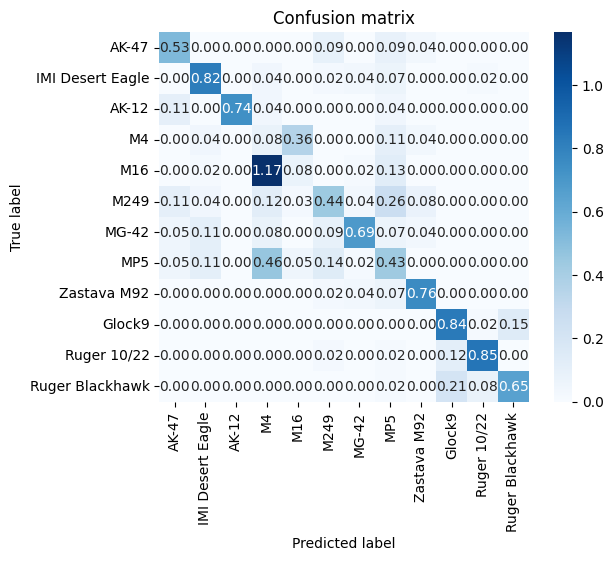

In [ ]:
def show_confusion_matrix(confusion, test_labels):
  """Compute confusion matrix and normalize."""
  confusion_normalized = confusion.astype("float") / confusion.sum(axis=1)
  axis_labels = test_labels
  ax = sns.heatmap(
      confusion_normalized, xticklabels=axis_labels, yticklabels=axis_labels,
      cmap='Blues', annot=True, fmt='.2f', square=True)
  plt.title("Confusion matrix")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

# Get the result of the dataset
result = my_modele.predict(val_ds)
result = np.argmax(result, axis=1)
print(result)

total = []
for element in val_ds.as_numpy_iterator():
  total.append(element[1])

all_total = np.concatenate(total)
print(all_total)
matrix = confusion_matrix(result, all_total)
print(matrix)
print()

# Print confusion matrix with Matplotlib and extra function
show_confusion_matrix(matrix, my_class)

# TESTING of audio

In [ ]:
testing_wav_data = load_wav_16k_mono('/content/2 (90).wav')           #correct prediction
scores, embeddings, spectrogram = yamnet_model(testing_wav_data)
result = my_modele(embeddings).numpy()

inferred_class = my_class[result.mean(axis=0).argmax()-1]
print(f'The main sound is: {inferred_class}')

The main sound is: IMI Desert Eagle


In [ ]:
testing_wav_data = load_wav_16k_mono('//content/7 (80).wav')           #correct prediction
scores, embeddings, spectrogram = yamnet_model(testing_wav_data)
result = my_modele(embeddings).numpy()

inferred_class = my_class[result.mean(axis=0).argmax()-1]
print(f'The main sound is: {inferred_class}')

The main sound is: MG-42


In [ ]:
testing_wav_data = load_wav_16k_mono('/content/11 (44).wav')           #correct prediction
scores, embeddings, spectrogram = yamnet_model(testing_wav_data)
result = my_modele(embeddings).numpy()

inferred_class = my_class[result.mean(axis=0).argmax()-1]
print(f'The main sound is: {inferred_class}')

The main sound is: Ruger 10/22


In [ ]:
testing_wav_data = load_wav_16k_mono('/content/12 (101).wav')           #correct prediction
scores, embeddings, spectrogram = yamnet_model(testing_wav_data)
result = my_modele(embeddings).numpy()

inferred_class = my_class[result.mean(axis=0).argmax()-1]
print(f'The main sound is: {inferred_class}')

The main sound is: Ruger Blackhawk


In [ ]:
testing_wav_data = load_wav_16k_mono('/content/4 (95).wav')           #wrong prediction
scores, embeddings, spectrogram = yamnet_model(testing_wav_data)
result = my_modele(embeddings).numpy()

inferred_class = my_class[result.mean(axis=0).argmax()-1]
print(f'The main sound is: {inferred_class}')

The main sound is: M16
